**Data Analyst :Khalid Lemouden**



**1. Ask**

**1.1 The business task**

The problem we are trying to solve is to gain insights into how consumers are using smart device data to gain insight into how consumers are using their smart devices. By analyzing the data from these devices, we aim to understand user behavior, preferences, and patterns, which can guide Bellabeat's marketing strategy to unlock new growth opportunities, either product enhancements, new product development etc.

**1.2. The Stakeholders**

The stakeholders for this analysis include:
 
Urška Sršen (Bellabeat's Cofounder and Chief Creative Officer)
Sando Mur (Bellabeat's Cofounder and key member of the executive team)
Bellabeat Marketing Analytics Team (including the junior data analyst)
 
The primary audience for this analysis is the Bellabeat executive team, which includes Urška Sršen and Sando Mur.
 
Marketing Strategy: By analyzing user data, Bellabeat can identify target segments, optimal engagement times, and the most effective marketing channels for their products.
 
 

**2: Prepare**

**2.1.Data Collection:**

This dataset generated by respondents to a distributed survey via Amazon Mechanical Turk between 03.12.2016-05.12.2016. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports can be parsed by export session ID (column A) or timestamp (column B). Variation between output represents use of different types of Fitbit trackers and individual tracking behaviors / preferences.


**2.1.1 Download data and store it appropriately.**

Using R, installing packages, loading libraries, and uploading the data into Rstudio

* Install packages

install.packages(c("tidyverse",  "lubridate", "conflicted", "reshape2"))

* Load packages

library(tidyverse)
library(lubridate)
library(conflicted)
library(reshape2)

In [1]:
library(tidyverse)
library(lubridate)
library(conflicted)
library(reshape2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
 # Load data from CSV files
activity <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
steps <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
sleep <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
hourly_steps<- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourly_calories <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv") 
hourly_intensities <- read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv") 



Rows: 940 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): ActivityDate
dbl (14): Id, TotalSteps, TotalDistance, TrackerDistance, LoggedActivitiesDi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 940 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): ActivityDay
dbl (2): Id, StepTotal

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 413 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): SleepDay
dbl (4): Id, TotalSleepRecords, TotalMinutesAsleep, TotalTimeInBed

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set

**2.1.2 Ensure data quality by checking for completeness and accuracy.**

In [3]:
#Viewing the dataframes
head(activity)
str(activity)

head(steps)
str(steps)

head(hourly_steps)
str(hourly_steps)

head(hourly_calories)
str(hourly_calories)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


spc_tbl_ [940 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                      : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:940] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:940] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:940] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:940] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:940] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:940] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:940] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:940] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:940] 328 217 181 209 221 1

Id,ActivityDay,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016,13162
1503960366,4/13/2016,10735
1503960366,4/14/2016,10460
1503960366,4/15/2016,9762
1503960366,4/16/2016,12669
1503960366,4/17/2016,9705


spc_tbl_ [940 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id         : num [1:940] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDay: chr [1:940] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ StepTotal  : num [1:940] 13162 10735 10460 9762 12669 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityDay = col_character(),
  ..   StepTotal = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Id,ActivityHour,StepTotal
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,373
1503960366,4/12/2016 1:00:00 AM,160
1503960366,4/12/2016 2:00:00 AM,151
1503960366,4/12/2016 3:00:00 AM,0
1503960366,4/12/2016 4:00:00 AM,0
1503960366,4/12/2016 5:00:00 AM,0


spc_tbl_ [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ StepTotal   : num [1:22099] 373 160 151 0 0 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   StepTotal = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


Id,ActivityHour,Calories
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,81
1503960366,4/12/2016 1:00:00 AM,61
1503960366,4/12/2016 2:00:00 AM,59
1503960366,4/12/2016 3:00:00 AM,47
1503960366,4/12/2016 4:00:00 AM,48
1503960366,4/12/2016 5:00:00 AM,48


spc_tbl_ [22,099 × 3] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id          : num [1:22099] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityHour: chr [1:22099] "4/12/2016 12:00:00 AM" "4/12/2016 1:00:00 AM" "4/12/2016 2:00:00 AM" "4/12/2016 3:00:00 AM" ...
 $ Calories    : num [1:22099] 81 61 59 47 48 48 48 47 68 141 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   ActivityHour = col_character(),
  ..   Calories = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [4]:
head(sleep)
str(sleep)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


spc_tbl_ [413 × 5] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Id                : num [1:413] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ SleepDay          : chr [1:413] "4/12/2016 12:00:00 AM" "4/13/2016 12:00:00 AM" "4/15/2016 12:00:00 AM" "4/16/2016 12:00:00 AM" ...
 $ TotalSleepRecords : num [1:413] 1 2 1 2 1 1 1 1 1 1 ...
 $ TotalMinutesAsleep: num [1:413] 327 384 412 340 700 304 360 325 361 430 ...
 $ TotalTimeInBed    : num [1:413] 346 407 442 367 712 320 377 364 384 449 ...
 - attr(*, "spec")=
  .. cols(
  ..   Id = col_double(),
  ..   SleepDay = col_character(),
  ..   TotalSleepRecords = col_double(),
  ..   TotalMinutesAsleep = col_double(),
  ..   TotalTimeInBed = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


In [5]:
#Sample size

distinct_activity <- activity %>%
  pull(Id) %>%                
  n_distinct()                 
print(distinct_activity)

distinct_sleep <- sleep %>%
  pull(Id) %>%                
  n_distinct()                 
print(distinct_sleep)

distinct_steps <- steps %>%
  pull(Id) %>%                
  n_distinct()                 
print(distinct_steps)

distinct_weight <- weight %>%
  pull(Id) %>%                
  n_distinct()                 
print(distinct_weight)

num_hourly_intensities <- hourly_intensities %>%
  pull(Id) %>%                
  n_distinct()                 
print(num_hourly_intensities)

num_hourly_calories <- hourly_calories %>%
  pull(Id) %>%                
  n_distinct()                 
print(num_hourly_calories)

num_hourly_steps <- hourly_steps %>%
  pull(Id) %>%                
  n_distinct()                 
print(num_hourly_steps)

#weight is 8 distinct, delete table
rm(weight)


[1] 33
[1] 24
[1] 33
[1] 8
[1] 33
[1] 33
[1] 33


**2.2. Data Cleaning:**

**2.2.1. Check for missing values**

Handle missing data points by imputing or removing them.
Decide on a strategy to deal with missing data, such as imputation or removal.
  

In [6]:
zero_steps <- sum(activity$TotalSteps == 0)

# Print the count
print(zero_steps)

[1] 77


In [7]:
zero_sleep <- sum(sleep$TotalMinutesAsleep == 0)

# Print the count
print(zero_sleep)

[1] 0


**2.2.2. Impute missing values**

Removing rows with missing values. In this case activity dataframe where Total steps is zero

In [8]:
# Remove rows where TotalSteps is equal to 0
cleaned_activity <- activity %>%
  dplyr::filter(TotalSteps != 0)

print(cleaned_activity)

# A tibble: 863 × 15
           Id ActivityDate TotalSteps TotalDistance TrackerDistance
        <dbl> <chr>             <dbl>         <dbl>           <dbl>
 1 1503960366 4/12/2016         13162          8.5             8.5 
 2 1503960366 4/13/2016         10735          6.97            6.97
 3 1503960366 4/14/2016         10460          6.74            6.74
 4 1503960366 4/15/2016          9762          6.28            6.28
 5 1503960366 4/16/2016         12669          8.16            8.16
 6 1503960366 4/17/2016          9705          6.48            6.48
 7 1503960366 4/18/2016         13019          8.59            8.59
 8 1503960366 4/19/2016         15506          9.88            9.88
 9 1503960366 4/20/2016         10544          6.68            6.68
10 1503960366 4/21/2016          9819          6.34            6.34
# ℹ 853 more rows
# ℹ 10 more variables: LoggedActivitiesDistance <dbl>,
#   VeryActiveDistance <dbl>, ModeratelyActiveDistance <dbl>,
#   LightActiveDistance <dbl

In [9]:
#checking the number of distinct Id

distinct_cleaned_activity <- cleaned_activity %>%
  pull(Id) %>%                
  n_distinct()      

print(distinct_cleaned_activity)

[1] 33


In [10]:
zero_hourly_calories <- sum(hourly_calories$Calories == 0)

# Print the count
print(zero_hourly_calories)

[1] 0


**2.2.3.Remove duplicates and outliers that may distort the analysis.**

Identify and eliminate duplicate rows and outliers.
  

In [11]:
#checking for duplicates

activity_duplicate_rows <- sum(duplicated(cleaned_activity))
print(activity_duplicate_rows)

sleep_duplicate_rows <- sum(duplicated(sleep))
print(sleep_duplicate_rows)

hourly_calories_duplicate_rows <- sum(duplicated(hourly_calories))
print(hourly_calories_duplicate_rows)

hourly_steps_duplicate_rows <- sum(duplicated(hourly_steps))
print(hourly_steps_duplicate_rows)

hourly_intensities_duplicate_rows <- sum(duplicated(hourly_intensities))
print(hourly_intensities_duplicate_rows)


[1] 0
[1] 3
[1] 0
[1] 0
[1] 0


In [12]:
#removing duplicate rows

cleaned_sleep <- unique(sleep)
print(cleaned_sleep)

# A tibble: 410 × 5
           Id SleepDay       TotalSleepRecords TotalMinutesAsleep TotalTimeInBed
        <dbl> <chr>                      <dbl>              <dbl>          <dbl>
 1 1503960366 4/12/2016 12:…                 1                327            346
 2 1503960366 4/13/2016 12:…                 2                384            407
 3 1503960366 4/15/2016 12:…                 1                412            442
 4 1503960366 4/16/2016 12:…                 2                340            367
 5 1503960366 4/17/2016 12:…                 1                700            712
 6 1503960366 4/19/2016 12:…                 1                304            320
 7 1503960366 4/20/2016 12:…                 1                360            377
 8 1503960366 4/21/2016 12:…                 1                325            364
 9 1503960366 4/23/2016 12:…                 1                361            384
10 1503960366 4/24/2016 12:…                 1                430            449
# ℹ 400 

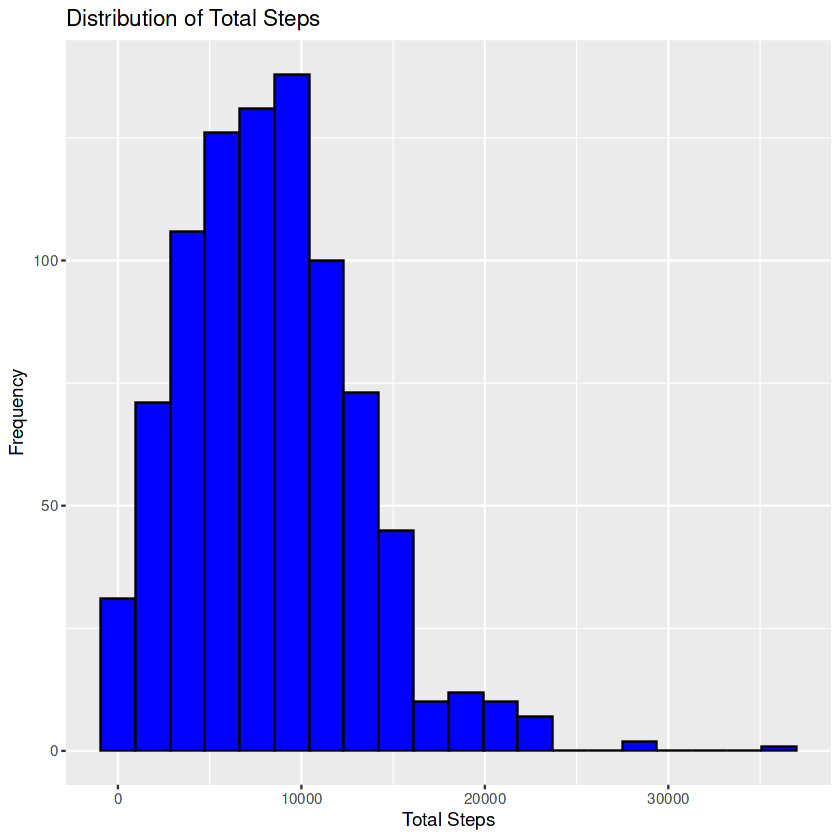

In [13]:
# 3. Checking for outliers using a histogram of TotalSteps
ggplot(data = cleaned_activity) +
  geom_histogram(aes(x = TotalSteps), bins = 20, fill = "blue", color = "black") +
  labs(title = "Distribution of Total Steps", x = "Total Steps", y = "Frequency")

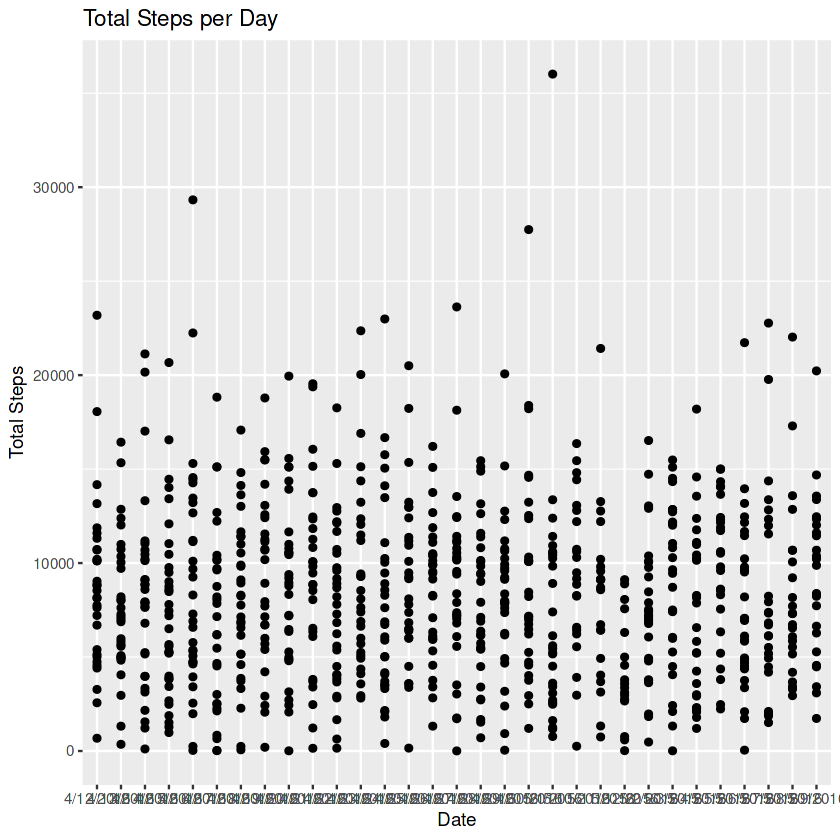

In [14]:
ggplot(data = cleaned_activity, aes(x = ActivityDate, y = TotalSteps)) +
  geom_point() +
  labs(title = "Total Steps per Day", x = "Date", y = "Total Steps")

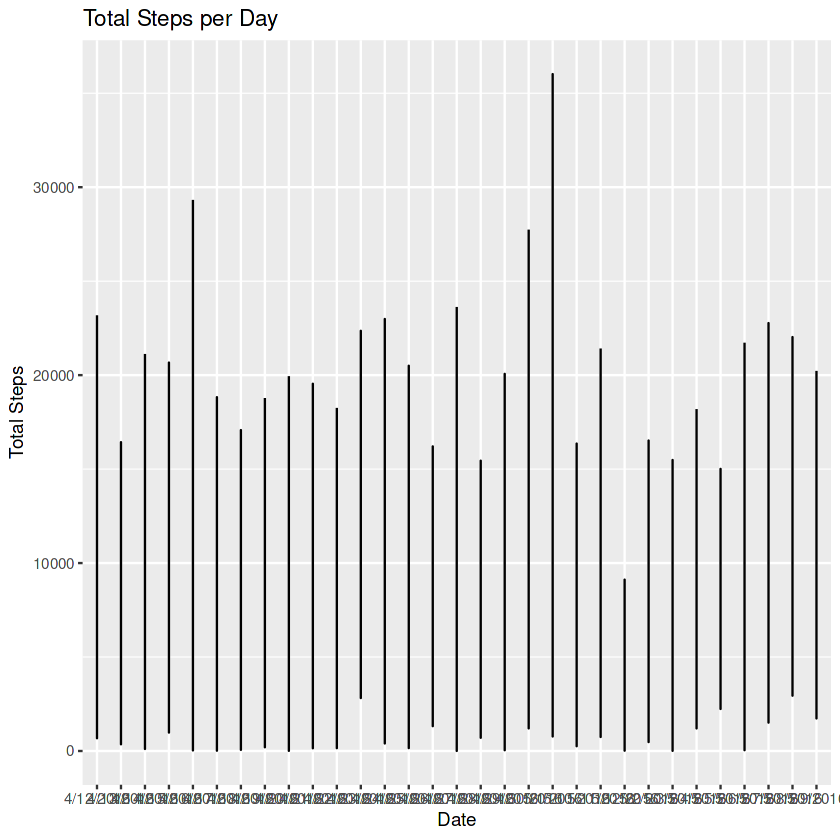

In [15]:
ggplot(data = cleaned_activity, aes(x = ActivityDate, y = TotalSteps)) +
  geom_line() +
  labs(title = "Total Steps per Day", x = "Date", y = "Total Steps")

Removing activities above 30,000steps

In [16]:
# Filter rows where TotalSteps is less than or equal to 30,000
cleaned_activity <- subset(cleaned_activity, TotalSteps <= 30000)


In [17]:
#checking distinct values

distinct_cleaned_activity <- cleaned_activity %>%
  pull(Id) %>%                
  n_distinct()      

print(distinct_cleaned_activity)

[1] 33


In [18]:
str(cleaned_activity)

tibble [862 × 15] (S3: tbl_df/tbl/data.frame)
 $ Id                      : num [1:862] 1.5e+09 1.5e+09 1.5e+09 1.5e+09 1.5e+09 ...
 $ ActivityDate            : chr [1:862] "4/12/2016" "4/13/2016" "4/14/2016" "4/15/2016" ...
 $ TotalSteps              : num [1:862] 13162 10735 10460 9762 12669 ...
 $ TotalDistance           : num [1:862] 8.5 6.97 6.74 6.28 8.16 ...
 $ TrackerDistance         : num [1:862] 8.5 6.97 6.74 6.28 8.16 ...
 $ LoggedActivitiesDistance: num [1:862] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveDistance      : num [1:862] 1.88 1.57 2.44 2.14 2.71 ...
 $ ModeratelyActiveDistance: num [1:862] 0.55 0.69 0.4 1.26 0.41 ...
 $ LightActiveDistance     : num [1:862] 6.06 4.71 3.91 2.83 5.04 ...
 $ SedentaryActiveDistance : num [1:862] 0 0 0 0 0 0 0 0 0 0 ...
 $ VeryActiveMinutes       : num [1:862] 25 21 30 29 36 38 42 50 28 19 ...
 $ FairlyActiveMinutes     : num [1:862] 13 19 11 34 10 20 16 31 12 8 ...
 $ LightlyActiveMinutes    : num [1:862] 328 217 181 209 221 164 233 264 205

**2.2.4 Consistent Date Formats:**

Ensuring that dates are in the same format throughout the dataset. 


In [19]:
# Convert "ActivityDate" column to Date format
cleaned_activity$ActivityDate <- mdy(cleaned_activity$ActivityDate)

print(cleaned_activity)

# A tibble: 862 × 15
           Id ActivityDate TotalSteps TotalDistance TrackerDistance
        <dbl> <date>            <dbl>         <dbl>           <dbl>
 1 1503960366 2016-04-12        13162          8.5             8.5 
 2 1503960366 2016-04-13        10735          6.97            6.97
 3 1503960366 2016-04-14        10460          6.74            6.74
 4 1503960366 2016-04-15         9762          6.28            6.28
 5 1503960366 2016-04-16        12669          8.16            8.16
 6 1503960366 2016-04-17         9705          6.48            6.48
 7 1503960366 2016-04-18        13019          8.59            8.59
 8 1503960366 2016-04-19        15506          9.88            9.88
 9 1503960366 2016-04-20        10544          6.68            6.68
10 1503960366 2016-04-21         9819          6.34            6.34
# ℹ 852 more rows
# ℹ 10 more variables: LoggedActivitiesDistance <dbl>,
#   VeryActiveDistance <dbl>, ModeratelyActiveDistance <dbl>,
#   LightActiveDistance <dbl

In [20]:
#Add weekday
cleaned_activity <- cleaned_activity %>%
  mutate(Weekday = weekdays(ActivityDate))

print(cleaned_activity)

# A tibble: 862 × 16
           Id ActivityDate TotalSteps TotalDistance TrackerDistance
        <dbl> <date>            <dbl>         <dbl>           <dbl>
 1 1503960366 2016-04-12        13162          8.5             8.5 
 2 1503960366 2016-04-13        10735          6.97            6.97
 3 1503960366 2016-04-14        10460          6.74            6.74
 4 1503960366 2016-04-15         9762          6.28            6.28
 5 1503960366 2016-04-16        12669          8.16            8.16
 6 1503960366 2016-04-17         9705          6.48            6.48
 7 1503960366 2016-04-18        13019          8.59            8.59
 8 1503960366 2016-04-19        15506          9.88            9.88
 9 1503960366 2016-04-20        10544          6.68            6.68
10 1503960366 2016-04-21         9819          6.34            6.34
# ℹ 852 more rows
# ℹ 11 more variables: LoggedActivitiesDistance <dbl>,
#   VeryActiveDistance <dbl>, ModeratelyActiveDistance <dbl>,
#   LightActiveDistance <dbl

In [21]:
# Convert "SleepDay" column to Date format without time

cleaned_sleep$SleepDay <- as.Date(mdy_hms(cleaned_sleep$SleepDay))

print(cleaned_sleep)



# A tibble: 410 × 5
           Id SleepDay   TotalSleepRecords TotalMinutesAsleep TotalTimeInBed
        <dbl> <date>                 <dbl>              <dbl>          <dbl>
 1 1503960366 2016-04-12                 1                327            346
 2 1503960366 2016-04-13                 2                384            407
 3 1503960366 2016-04-15                 1                412            442
 4 1503960366 2016-04-16                 2                340            367
 5 1503960366 2016-04-17                 1                700            712
 6 1503960366 2016-04-19                 1                304            320
 7 1503960366 2016-04-20                 1                360            377
 8 1503960366 2016-04-21                 1                325            364
 9 1503960366 2016-04-23                 1                361            384
10 1503960366 2016-04-24                 1                430            449
# ℹ 400 more rows


In [22]:
#Add weekday
cleaned_sleep <- cleaned_sleep %>%
  mutate(Weekday = weekdays(SleepDay))

print(cleaned_sleep)

# A tibble: 410 × 6
       Id SleepDay   TotalSleepRecords TotalMinutesAsleep TotalTimeInBed Weekday
    <dbl> <date>                 <dbl>              <dbl>          <dbl> <chr>  
 1 1.50e9 2016-04-12                 1                327            346 Tuesday
 2 1.50e9 2016-04-13                 2                384            407 Wednes…
 3 1.50e9 2016-04-15                 1                412            442 Friday 
 4 1.50e9 2016-04-16                 2                340            367 Saturd…
 5 1.50e9 2016-04-17                 1                700            712 Sunday 
 6 1.50e9 2016-04-19                 1                304            320 Tuesday
 7 1.50e9 2016-04-20                 1                360            377 Wednes…
 8 1.50e9 2016-04-21                 1                325            364 Thursd…
 9 1.50e9 2016-04-23                 1                361            384 Saturd…
10 1.50e9 2016-04-24                 1                430            449 Sunday 
# ℹ 400 

In [23]:
library(hms)

In [24]:
# Convert "ActivityHour" to date-time format
hourly_calories <- hourly_calories %>%
  mutate(
    ActivityHour = mdy_hms(ActivityHour, tz = "UTC"),  
    Date = as.Date(ActivityHour),                      
    Time = as_hms(ActivityHour),                       
    Weekday = weekdays(ActivityHour)                   
  )

print(hourly_calories)

# A tibble: 22,099 × 6
           Id ActivityHour        Calories Date       Time   Weekday
        <dbl> <dttm>                 <dbl> <date>     <time> <chr>  
 1 1503960366 2016-04-12 00:00:00       81 2016-04-12 00:00  Tuesday
 2 1503960366 2016-04-12 01:00:00       61 2016-04-12 01:00  Tuesday
 3 1503960366 2016-04-12 02:00:00       59 2016-04-12 02:00  Tuesday
 4 1503960366 2016-04-12 03:00:00       47 2016-04-12 03:00  Tuesday
 5 1503960366 2016-04-12 04:00:00       48 2016-04-12 04:00  Tuesday
 6 1503960366 2016-04-12 05:00:00       48 2016-04-12 05:00  Tuesday
 7 1503960366 2016-04-12 06:00:00       48 2016-04-12 06:00  Tuesday
 8 1503960366 2016-04-12 07:00:00       47 2016-04-12 07:00  Tuesday
 9 1503960366 2016-04-12 08:00:00       68 2016-04-12 08:00  Tuesday
10 1503960366 2016-04-12 09:00:00      141 2016-04-12 09:00  Tuesday
# ℹ 22,089 more rows


In [25]:
# Convert "Hour" to date-time format
hourly_intensities <- hourly_intensities %>%
  mutate(
    ActivityHour = mdy_hms(ActivityHour, tz = "UTC"),  
    Date = as.Date(ActivityHour),                      
    Time = as_hms(ActivityHour),                       
    Weekday = weekdays(ActivityHour)                   
  )

print(hourly_intensities)

# A tibble: 22,099 × 7
         Id ActivityHour        TotalIntensity AverageIntensity Date       Time 
      <dbl> <dttm>                       <dbl>            <dbl> <date>     <tim>
 1   1.50e9 2016-04-12 00:00:00             20            0.333 2016-04-12 00:00
 2   1.50e9 2016-04-12 01:00:00              8            0.133 2016-04-12 01:00
 3   1.50e9 2016-04-12 02:00:00              7            0.117 2016-04-12 02:00
 4   1.50e9 2016-04-12 03:00:00              0            0     2016-04-12 03:00
 5   1.50e9 2016-04-12 04:00:00              0            0     2016-04-12 04:00
 6   1.50e9 2016-04-12 05:00:00              0            0     2016-04-12 05:00
 7   1.50e9 2016-04-12 06:00:00              0            0     2016-04-12 06:00
 8   1.50e9 2016-04-12 07:00:00              0            0     2016-04-12 07:00
 9   1.50e9 2016-04-12 08:00:00             13            0.217 2016-04-12 08:00
10   1.50e9 2016-04-12 09:00:00             30            0.5   2016-04-12 09:00
# ℹ 2

In [26]:
# Convert "ActivityHour" to date-time format
hourly_steps <- hourly_steps %>%
  mutate(
    ActivityHour = mdy_hms(ActivityHour, tz = "UTC"),  
    Date = as.Date(ActivityHour),                      
    Time = as_hms(ActivityHour),                       
    Weekday = weekdays(ActivityHour)                  
  )

print(hourly_steps)

# A tibble: 22,099 × 6
           Id ActivityHour        StepTotal Date       Time   Weekday
        <dbl> <dttm>                  <dbl> <date>     <time> <chr>  
 1 1503960366 2016-04-12 00:00:00       373 2016-04-12 00:00  Tuesday
 2 1503960366 2016-04-12 01:00:00       160 2016-04-12 01:00  Tuesday
 3 1503960366 2016-04-12 02:00:00       151 2016-04-12 02:00  Tuesday
 4 1503960366 2016-04-12 03:00:00         0 2016-04-12 03:00  Tuesday
 5 1503960366 2016-04-12 04:00:00         0 2016-04-12 04:00  Tuesday
 6 1503960366 2016-04-12 05:00:00         0 2016-04-12 05:00  Tuesday
 7 1503960366 2016-04-12 06:00:00         0 2016-04-12 06:00  Tuesday
 8 1503960366 2016-04-12 07:00:00         0 2016-04-12 07:00  Tuesday
 9 1503960366 2016-04-12 08:00:00       250 2016-04-12 08:00  Tuesday
10 1503960366 2016-04-12 09:00:00      1864 2016-04-12 09:00  Tuesday
# ℹ 22,089 more rows


Renaming columns


In [27]:
# Renaming columns
cleaned_activity <- cleaned_activity %>%
  rename(Date = ActivityDate)

print(cleaned_activity)

# A tibble: 862 × 16
           Id Date       TotalSteps TotalDistance TrackerDistance
        <dbl> <date>          <dbl>         <dbl>           <dbl>
 1 1503960366 2016-04-12      13162          8.5             8.5 
 2 1503960366 2016-04-13      10735          6.97            6.97
 3 1503960366 2016-04-14      10460          6.74            6.74
 4 1503960366 2016-04-15       9762          6.28            6.28
 5 1503960366 2016-04-16      12669          8.16            8.16
 6 1503960366 2016-04-17       9705          6.48            6.48
 7 1503960366 2016-04-18      13019          8.59            8.59
 8 1503960366 2016-04-19      15506          9.88            9.88
 9 1503960366 2016-04-20      10544          6.68            6.68
10 1503960366 2016-04-21       9819          6.34            6.34
# ℹ 852 more rows
# ℹ 11 more variables: LoggedActivitiesDistance <dbl>,
#   VeryActiveDistance <dbl>, ModeratelyActiveDistance <dbl>,
#   LightActiveDistance <dbl>, SedentaryActiveDistan

In [28]:
cleaned_sleep <- cleaned_sleep %>%
  rename(Date = SleepDay)

print(cleaned_sleep)

# A tibble: 410 × 6
       Id Date       TotalSleepRecords TotalMinutesAsleep TotalTimeInBed Weekday
    <dbl> <date>                 <dbl>              <dbl>          <dbl> <chr>  
 1 1.50e9 2016-04-12                 1                327            346 Tuesday
 2 1.50e9 2016-04-13                 2                384            407 Wednes…
 3 1.50e9 2016-04-15                 1                412            442 Friday 
 4 1.50e9 2016-04-16                 2                340            367 Saturd…
 5 1.50e9 2016-04-17                 1                700            712 Sunday 
 6 1.50e9 2016-04-19                 1                304            320 Tuesday
 7 1.50e9 2016-04-20                 1                360            377 Wednes…
 8 1.50e9 2016-04-21                 1                325            364 Thursd…
 9 1.50e9 2016-04-23                 1                361            384 Saturd…
10 1.50e9 2016-04-24                 1                430            449 Sunday 
# ℹ 400 

In [29]:
print(cleaned_activity)
print(cleaned_sleep)

# A tibble: 862 × 16
           Id Date       TotalSteps TotalDistance TrackerDistance
        <dbl> <date>          <dbl>         <dbl>           <dbl>
 1 1503960366 2016-04-12      13162          8.5             8.5 
 2 1503960366 2016-04-13      10735          6.97            6.97
 3 1503960366 2016-04-14      10460          6.74            6.74
 4 1503960366 2016-04-15       9762          6.28            6.28
 5 1503960366 2016-04-16      12669          8.16            8.16
 6 1503960366 2016-04-17       9705          6.48            6.48
 7 1503960366 2016-04-18      13019          8.59            8.59
 8 1503960366 2016-04-19      15506          9.88            9.88
 9 1503960366 2016-04-20      10544          6.68            6.68
10 1503960366 2016-04-21       9819          6.34            6.34
# ℹ 852 more rows
# ℹ 11 more variables: LoggedActivitiesDistance <dbl>,
#   VeryActiveDistance <dbl>, ModeratelyActiveDistance <dbl>,
#   LightActiveDistance <dbl>, SedentaryActiveDistan

**2.3. Data Exploration:**
 
Create summary statistics to understand the basic characteristics of the data.

Calculate summary statistics like mean, median, and standard deviation.

In [30]:
summary(cleaned_activity)

       Id                 Date              TotalSteps    TotalDistance   
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :    4   Min.   : 0.000  
 1st Qu.:2.320e+09   1st Qu.:2016-04-18   1st Qu.: 4922   1st Qu.: 3.370  
 Median :4.445e+09   Median :2016-04-26   Median : 8027   Median : 5.585  
 Mean   :4.861e+09   Mean   :2016-04-26   Mean   : 8287   Mean   : 5.954  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-03   3rd Qu.:11075   3rd Qu.: 7.888  
 Max.   :8.878e+09   Max.   :2016-05-12   Max.   :29326   Max.   :26.720  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.000            Min.   : 0.000    
 1st Qu.: 3.370   1st Qu.:0.000            1st Qu.: 0.000    
 Median : 5.585   Median :0.000            Median : 0.410    
 Mean   : 5.938   Mean   :0.118            Mean   : 1.613    
 3rd Qu.: 7.878   3rd Qu.:0.000            3rd Qu.: 2.265    
 Max.   :26.720   Max.   :4.942            Max.   :21.660    
 ModeratelyActiveDistance LightActiveDist

In [31]:
summary(cleaned_sleep)

       Id                 Date            TotalSleepRecords TotalMinutesAsleep
 Min.   :1.504e+09   Min.   :2016-04-12   Min.   :1.00      Min.   : 58.0     
 1st Qu.:3.977e+09   1st Qu.:2016-04-19   1st Qu.:1.00      1st Qu.:361.0     
 Median :4.703e+09   Median :2016-04-27   Median :1.00      Median :432.5     
 Mean   :4.995e+09   Mean   :2016-04-26   Mean   :1.12      Mean   :419.2     
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04   3rd Qu.:1.00      3rd Qu.:490.0     
 Max.   :8.792e+09   Max.   :2016-05-12   Max.   :3.00      Max.   :796.0     
 TotalTimeInBed    Weekday         
 Min.   : 61.0   Length:410        
 1st Qu.:403.8   Class :character  
 Median :463.0   Mode  :character  
 Mean   :458.5                     
 3rd Qu.:526.0                     
 Max.   :961.0                     

**2.4. Data credibility**

Relevance: The dataset's relevance depends on how well it directly relates to the problem at hand. In this case, the dataset was generated by 30 eligible Fitbit users who consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Given that the data comes from Fitbit users and includes relevant metrics like physical activity and heart rate, it is directly relevant to understanding user behavior in the context of fitness tracking and health monitoring. However, it may not be directly relevant to all possible questions or analyses, depending on the specific research objectives.

Originality: The data was collected from respondents to a distributed survey via Amazon Mechanical Turk. While this source is commonly used for data collection, it does not inherently guarantee originality. It is possible that respondents may not provide entirely accurate or unique data. Therefore, while the data may not have been previously manipulated or altered, the originality may still be influenced by the nature of data collection.

Currency: The dataset was collected between 03.12.2016 and 05.12.2016. It is important to note that the data is outdated, and user behavior and preferences may have changed since then. The lack of recent data can limit the relevance and applicability of the findings to current user behavior.

Comprehensiveness: The dataset covers minute-level records for physical activity, heart rate, and sleep monitoring. However, it has limitations in terms of comprehensiveness. It only includes data from 24 to 33 individuals, which may not be representative of a broader population. Additionally, the dataset lacks information on user demographics and other relevant data that could provide context for the analysis. This limited scope may affect the depth and completeness of the insights that can be derived from the data.

Credibility: The data was generated by respondents to a distributed survey via Amazon Mechanical Turk. While Mechanical Turk is a commonly used platform for data collection, the credibility of the data depends on the accuracy and honesty of the respondents. There may be a degree of uncertainty regarding the credibility of the data, as it relies on self-reported information from users. Additionally, without additional information about the survey methodology and quality control measures, it is challenging to assess the overall credibility of the dataset fully.

Issues with the Data:

Missing or Incomplete Data: The dataset contains missing or incomplete entries, particularly in the sleep and activity records for some users (e.g., sleep data for 24 users and activity data for 33 users). These gaps can affect the accuracy and completeness of any analysis.

Data Biases: There may be biases in the data due to the sampling method (using Amazon Mechanical Turk) or the specific type of Fitbit users involved. This bias could impact the generalizability of findings to a broader population.

Data Limitations: The dataset has limitations, including the absence of other important metrics and user demographics. These limitations can constrain the depth and breadth of analysis that can be performed.

In summary, while the dataset has strengths in terms of relevance to fitness tracking and health monitoring, it also has notable limitations related to originality, currency, comprehensiveness, and credibility. Researchers should approach the data with caution, considering these factors when interpreting and drawing conclusions from the analysis. Additionally, addressing missing data and acknowledging potential biases are essential steps in ensuring the validity of any findings.

**3: Process**

**3.1 Data Transformation**

**3.1.1 Aggregation**


In [32]:
cleaned_activity <- cleaned_activity %>%
  mutate(TotalActiviteMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes + SedentaryMinutes)

print(cleaned_activity)

# A tibble: 862 × 17
           Id Date       TotalSteps TotalDistance TrackerDistance
        <dbl> <date>          <dbl>         <dbl>           <dbl>
 1 1503960366 2016-04-12      13162          8.5             8.5 
 2 1503960366 2016-04-13      10735          6.97            6.97
 3 1503960366 2016-04-14      10460          6.74            6.74
 4 1503960366 2016-04-15       9762          6.28            6.28
 5 1503960366 2016-04-16      12669          8.16            8.16
 6 1503960366 2016-04-17       9705          6.48            6.48
 7 1503960366 2016-04-18      13019          8.59            8.59
 8 1503960366 2016-04-19      15506          9.88            9.88
 9 1503960366 2016-04-20      10544          6.68            6.68
10 1503960366 2016-04-21       9819          6.34            6.34
# ℹ 852 more rows
# ℹ 12 more variables: LoggedActivitiesDistance <dbl>,
#   VeryActiveDistance <dbl>, ModeratelyActiveDistance <dbl>,
#   LightActiveDistance <dbl>, SedentaryActiveDistan

**3.1.2. Merging Data frames**

In [33]:
# Merge daily_activity and daily_sleep on ID and Date using inner join

daily <- inner_join(cleaned_activity, cleaned_sleep, by = c("Id", "Date"))
print(daily)

# A tibble: 410 × 21
           Id Date       TotalSteps TotalDistance TrackerDistance
        <dbl> <date>          <dbl>         <dbl>           <dbl>
 1 1503960366 2016-04-12      13162          8.5             8.5 
 2 1503960366 2016-04-13      10735          6.97            6.97
 3 1503960366 2016-04-15       9762          6.28            6.28
 4 1503960366 2016-04-16      12669          8.16            8.16
 5 1503960366 2016-04-17       9705          6.48            6.48
 6 1503960366 2016-04-19      15506          9.88            9.88
 7 1503960366 2016-04-20      10544          6.68            6.68
 8 1503960366 2016-04-21       9819          6.34            6.34
 9 1503960366 2016-04-23      14371          9.04            9.04
10 1503960366 2016-04-24      10039          6.41            6.41
# ℹ 400 more rows
# ℹ 16 more variables: LoggedActivitiesDistance <dbl>,
#   VeryActiveDistance <dbl>, ModeratelyActiveDistance <dbl>,
#   LightActiveDistance <dbl>, SedentaryActiveDistan

In [34]:
daily <- daily %>%
  rename(Weekday = Weekday.x) %>%
  select(-Weekday.y)

print(daily)

# A tibble: 410 × 20
           Id Date       TotalSteps TotalDistance TrackerDistance
        <dbl> <date>          <dbl>         <dbl>           <dbl>
 1 1503960366 2016-04-12      13162          8.5             8.5 
 2 1503960366 2016-04-13      10735          6.97            6.97
 3 1503960366 2016-04-15       9762          6.28            6.28
 4 1503960366 2016-04-16      12669          8.16            8.16
 5 1503960366 2016-04-17       9705          6.48            6.48
 6 1503960366 2016-04-19      15506          9.88            9.88
 7 1503960366 2016-04-20      10544          6.68            6.68
 8 1503960366 2016-04-21       9819          6.34            6.34
 9 1503960366 2016-04-23      14371          9.04            9.04
10 1503960366 2016-04-24      10039          6.41            6.41
# ℹ 400 more rows
# ℹ 15 more variables: LoggedActivitiesDistance <dbl>,
#   VeryActiveDistance <dbl>, ModeratelyActiveDistance <dbl>,
#   LightActiveDistance <dbl>, SedentaryActiveDistan

In [35]:
# Merge the hourly tables using left_join
hourly <- hourly_steps %>%
  left_join(hourly_intensities, by = c("Id", "ActivityHour", "Date", "Time", "Weekday")) %>%
  left_join(hourly_calories, by = c("Id", "ActivityHour", "Date", "Time", "Weekday"))
print(hourly)

# A tibble: 22,099 × 9
        Id ActivityHour        StepTotal Date       Time  Weekday TotalIntensity
     <dbl> <dttm>                  <dbl> <date>     <tim> <chr>            <dbl>
 1  1.50e9 2016-04-12 00:00:00       373 2016-04-12 00:00 Tuesday             20
 2  1.50e9 2016-04-12 01:00:00       160 2016-04-12 01:00 Tuesday              8
 3  1.50e9 2016-04-12 02:00:00       151 2016-04-12 02:00 Tuesday              7
 4  1.50e9 2016-04-12 03:00:00         0 2016-04-12 03:00 Tuesday              0
 5  1.50e9 2016-04-12 04:00:00         0 2016-04-12 04:00 Tuesday              0
 6  1.50e9 2016-04-12 05:00:00         0 2016-04-12 05:00 Tuesday              0
 7  1.50e9 2016-04-12 06:00:00         0 2016-04-12 06:00 Tuesday              0
 8  1.50e9 2016-04-12 07:00:00         0 2016-04-12 07:00 Tuesday              0
 9  1.50e9 2016-04-12 08:00:00       250 2016-04-12 08:00 Tuesday             13
10  1.50e9 2016-04-12 09:00:00      1864 2016-04-12 09:00 Tuesday             30
# ℹ 2

**4: Analyze**

**4.1. Descriptive Statistics:**
Calculate measures like mean, median, and standard deviation.

In [36]:
# Time range of the data
time_range <- cleaned_activity %>%
  summarize(earliest_date = min(as.Date(Date)),
            latest_date = max(as.Date(Date)))
print(time_range)


# A tibble: 1 × 2
  earliest_date latest_date
  <date>        <date>     
1 2016-04-12    2016-05-12 


In [37]:
# Calculate summary statistics for the most important variables steps, calories, and sleep

# Calculate summary statistics for important variables
summary_stats <- daily %>%
  summarise(
    Mean_TotalSteps = mean(TotalSteps),
    Min_TotalSteps = min(TotalSteps),
    Max_TotalSteps = max(TotalSteps),
    Mean_Calories = mean(Calories),
    Min_Calories = min(Calories),
    Max_Calories = max(Calories),
    Mean_TotalSleepRecords = mean(TotalMinutesAsleep),
    Min_TotalSleepRecords = min(TotalMinutesAsleep),
    Max_TotalSleepRecords = max(TotalMinutesAsleep)
  )

print(summary_stats)


# A tibble: 1 × 9
  Mean_TotalSteps Min_TotalSteps Max_TotalSteps Mean_Calories Min_Calories
            <dbl>          <dbl>          <dbl>         <dbl>        <dbl>
1           8515.             17          22770         2389.          257
# ℹ 4 more variables: Max_Calories <dbl>, Mean_TotalSleepRecords <dbl>,
#   Min_TotalSleepRecords <dbl>, Max_TotalSleepRecords <dbl>


In [38]:
# Calculate the average values for other activity-related variables 

activity_summary <- daily %>%
  summarise(
    Mean_VeryActiveMinutes = mean(VeryActiveMinutes),
    Mean_FairlyActiveMinutes = mean(FairlyActiveMinutes),
    Mean_LightlyActiveMinutes = mean(LightlyActiveMinutes),
    Mean_SedentaryMinutes = mean(SedentaryMinutes)
  )

print(activity_summary)

# A tibble: 1 × 4
  Mean_VeryActiveMinutes Mean_FairlyActiveMinutes Mean_LightlyActiveMinutes
                   <dbl>                    <dbl>                     <dbl>
1                   25.0                     17.9                      217.
# ℹ 1 more variable: Mean_SedentaryMinutes <dbl>


In [39]:
# Count how often each ID uses the app

id_counts <- daily %>%
  group_by(Id) %>%
  summarise(Usage_Count = n())

print(id_counts)


# A tibble: 24 × 2
           Id Usage_Count
        <dbl>       <int>
 1 1503960366          25
 2 1644430081           4
 3 1844505072           3
 4 1927972279           5
 5 2026352035          28
 6 2320127002           1
 7 2347167796          15
 8 3977333714          28
 9 4020332650           8
10 4319703577          26
# ℹ 14 more rows


In [40]:
# Calculate the average number of times the app is used per user (ID)
average_usage <- daily %>%
  group_by(Id) %>%
  summarise(Usage_Count = n()) %>%
  summarise(Average_Usage = mean(Usage_Count))

print(average_usage)


# A tibble: 1 × 1
  Average_Usage
          <dbl>
1          17.1


**4.2. Analysis using visualizations**

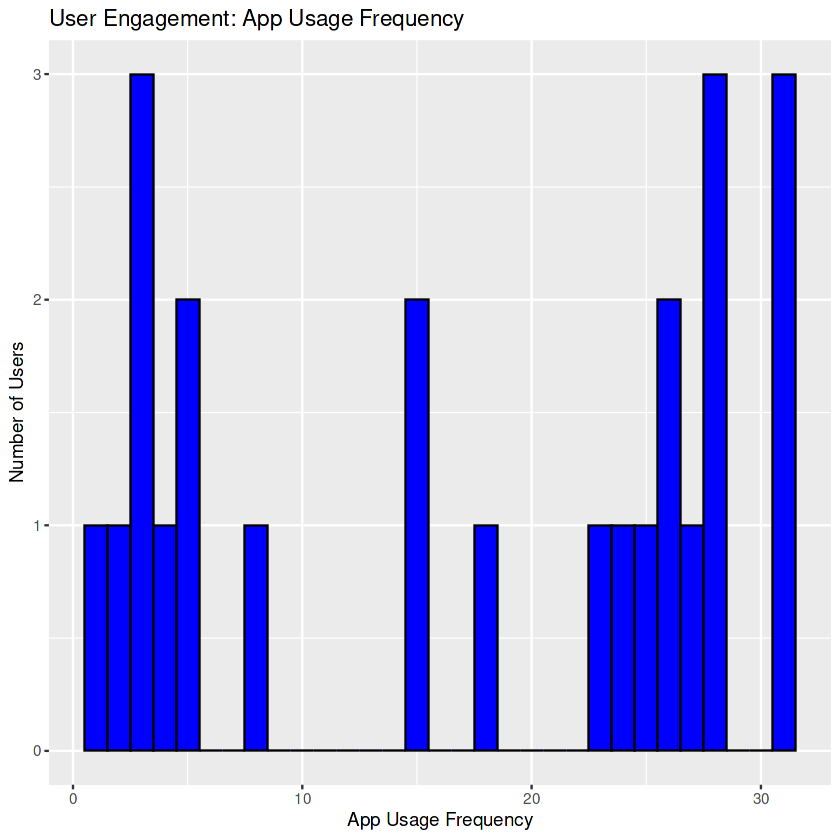

In [41]:

# Calculate the frequency of app usage per user (ID)
user_engagement <- daily %>%
  group_by(Id) %>%
  summarise(AppUsageFrequency = n_distinct(Date))

# Create a histogram or bar plot to visualize user engagement
ggplot(user_engagement, aes(x = AppUsageFrequency)) +
  geom_histogram(binwidth = 1, fill = "blue", color = "black") +
  labs(title = "User Engagement: App Usage Frequency", x = "App Usage Frequency", y = "Number of Users")

# Alternatively, create a bar plot
# ggplot(user_engagement, aes(x = AppUsageFrequency)) +
#   geom_bar(fill = "blue", color = "black") +
#   labs(title = "User Engagement: App Usage Frequency", x = "App Usage Frequency", y = "Number of Users")


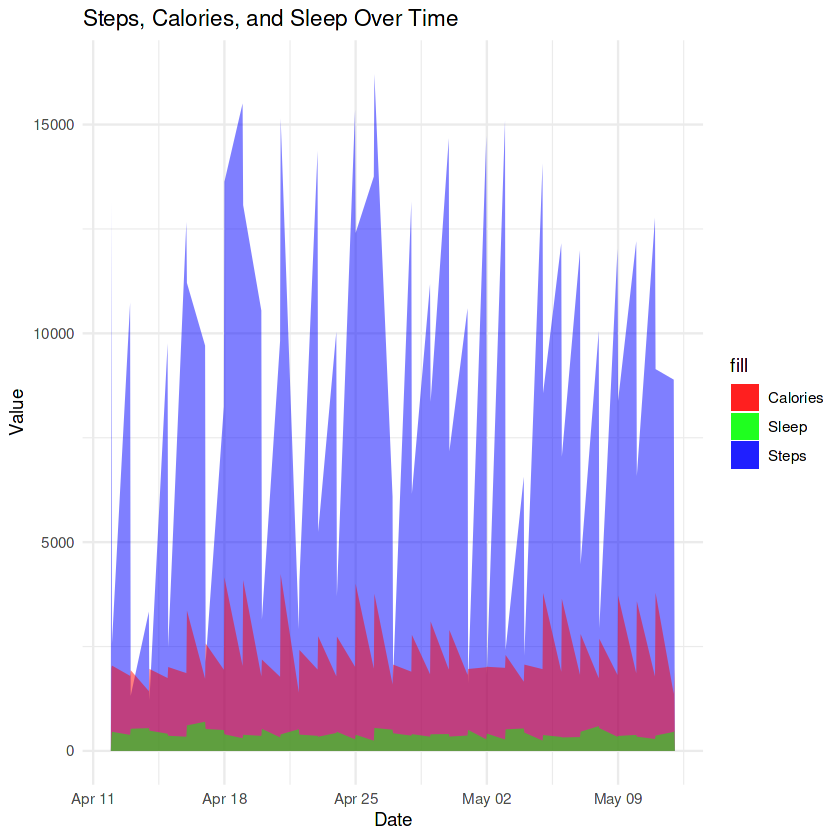

In [42]:

# Assuming you have columns TotalSteps, Calories, and TotalMinutesAsleep in your daily data frame
# Create an area plot for Steps, Calories, and Sleep over time

ggplot(daily, aes(x = Date)) +
  geom_area(aes(y = TotalSteps, fill = "Steps"), alpha = 0.5) +
  geom_area(aes(y = Calories, fill = "Calories"), alpha = 0.5) +
  geom_area(aes(y = TotalMinutesAsleep, fill = "Sleep"), alpha = 0.5) +
  labs(
    title = "Steps, Calories, and Sleep Over Time",
    x = "Date",
    y = "Value"
  ) +
  scale_fill_manual(
    values = c(Steps = "blue", Calories = "red", Sleep = "green"),
    labels = c(Steps = "Steps", Calories = "Calories", Sleep = "Sleep")
  ) +
  theme_minimal()


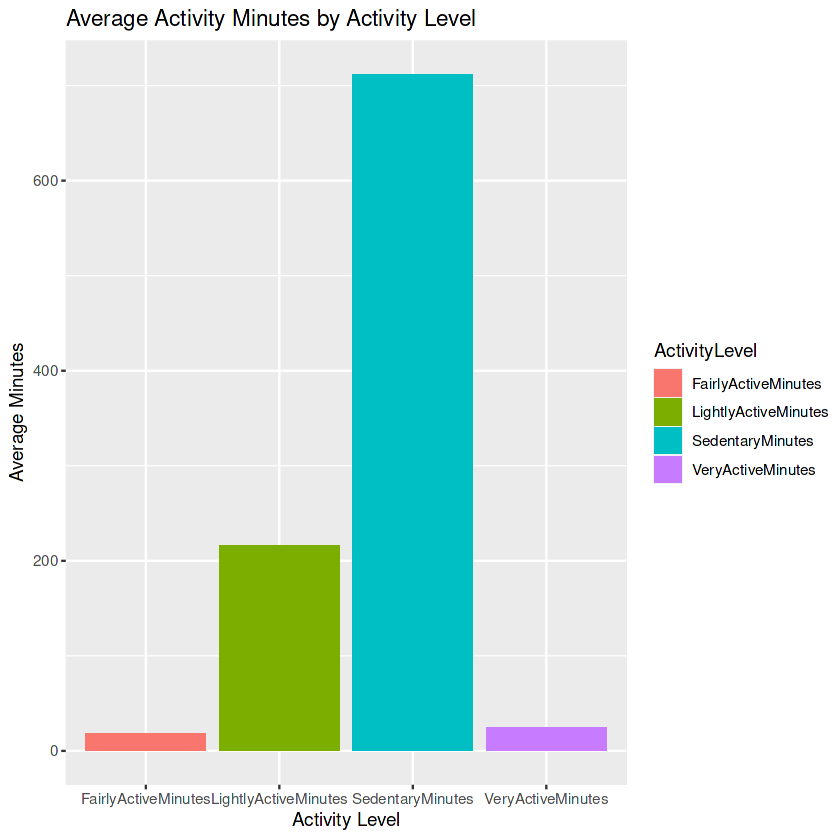

In [43]:
# Create a bar plot of activity minutes by activity level
daily %>%
  gather(key = "ActivityLevel", value = "Minutes", 
         VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes) %>%
  ggplot(aes(x = ActivityLevel, y = Minutes, fill = ActivityLevel)) +
  geom_bar(stat = "summary", fun = "mean") +
  labs(title = "Average Activity Minutes by Activity Level", x = "Activity Level", y = "Average Minutes")


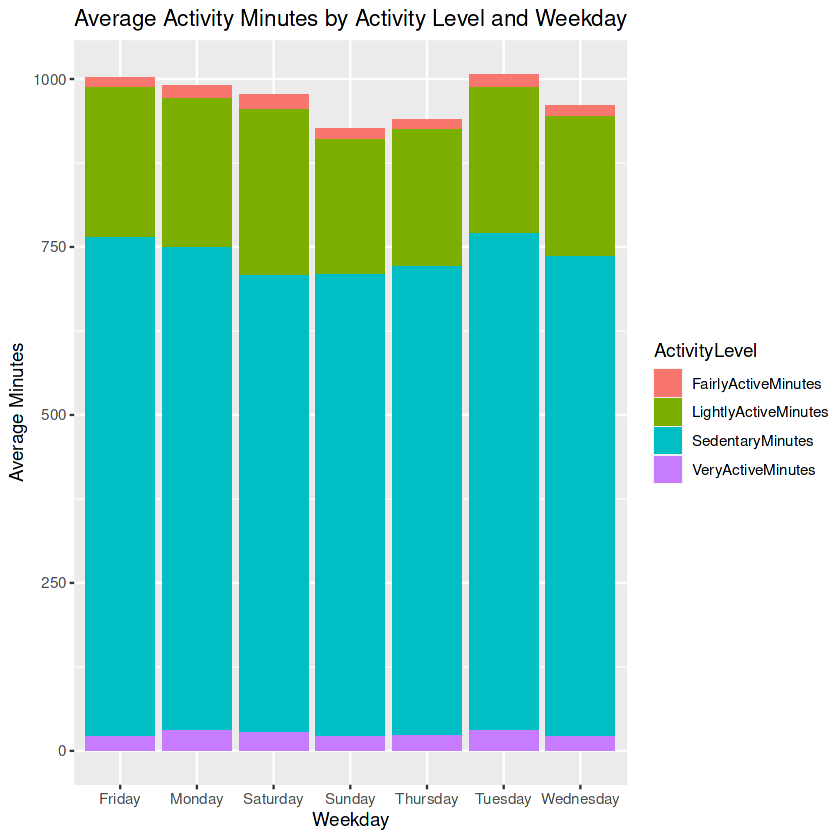

In [44]:
# Create a stacked bar plot of activity minutes by activity level and weekday

daily %>%
  gather(key = "ActivityLevel", value = "Minutes", 
         VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes) %>%
  ggplot(aes(x = Weekday, y = Minutes, fill = ActivityLevel)) +
  geom_bar(stat = "summary", fun = "mean", position = "stack") +
  labs(title = "Average Activity Minutes by Activity Level and Weekday", x = "Weekday", y = "Average Minutes")


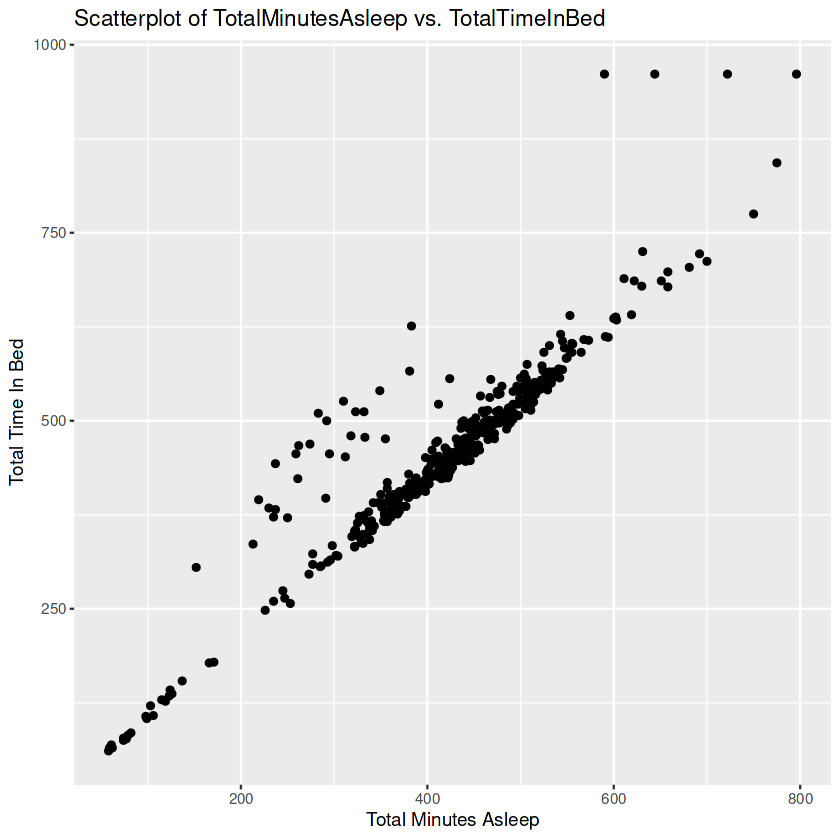

In [45]:
# Create a scatterplot of TotalMinutesAsleep vs. TotalTimeInBed

ggplot(daily, aes(x = TotalMinutesAsleep, y = TotalTimeInBed)) +
  geom_point() +
  labs(title = "Scatterplot of TotalMinutesAsleep vs. TotalTimeInBed", x = "Total Minutes Asleep", y = "Total Time In Bed")

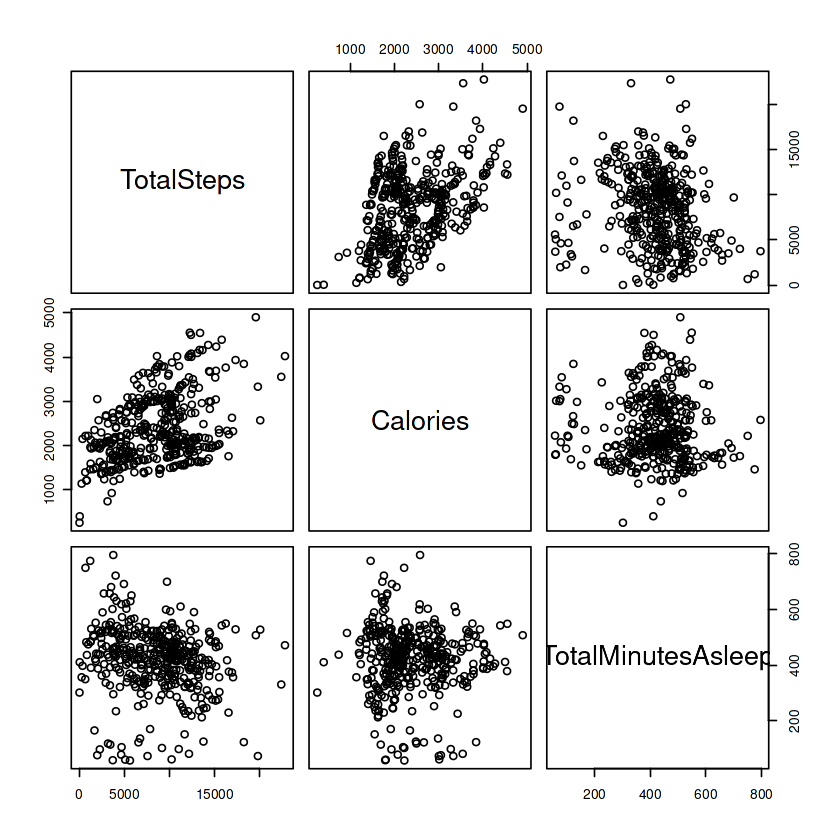

In [46]:
# Create a pairwise scatterplot matrix for Steps, Calories, and Sleep variables

plot_data <- daily %>%
  select(TotalSteps, Calories, TotalMinutesAsleep)

pairs(plot_data)


User Segmentation:

Segment users based on their activity levels, sleep patterns, or engagement with the app.
Tailor communication and product offerings to different user segments to improve user satisfaction and retention.

In [47]:
# Define threshold values for segmentation

low_activity_threshold <- 5  # Adjust as needed
high_activity_threshold <- 20  # Adjust as needed

# Create user segments based on TotalIntensity
user_segments <- hourly %>%
  group_by(Id) %>%
  summarise(
    Average_TotalIntensity = mean(TotalIntensity)
  ) %>%
  mutate(
    UserSegment = case_when(
      Average_TotalIntensity < low_activity_threshold ~ "Low Activity",
      Average_TotalIntensity >= low_activity_threshold & Average_TotalIntensity < high_activity_threshold ~ "Moderate Activity",
      Average_TotalIntensity >= high_activity_threshold ~ "High Activity",
      TRUE ~ "Unknown"
    )
  )

print(user_segments)


# A tibble: 33 × 3
           Id Average_TotalIntensity UserSegment      
        <dbl>                  <dbl> <chr>            
 1 1503960366                  16.2  Moderate Activity
 2 1624580081                   8.04 Moderate Activity
 3 1644430081                  10.5  Moderate Activity
 4 1844505072                   5.02 Moderate Activity
 5 1927972279                   1.86 Low Activity     
 6 2022484408                  17.0  Moderate Activity
 7 2026352035                  10.8  Moderate Activity
 8 2320127002                   8.74 Moderate Activity
 9 2347167796                  14.5  Moderate Activity
10 2873212765                  15.1  Moderate Activity
# ℹ 23 more rows


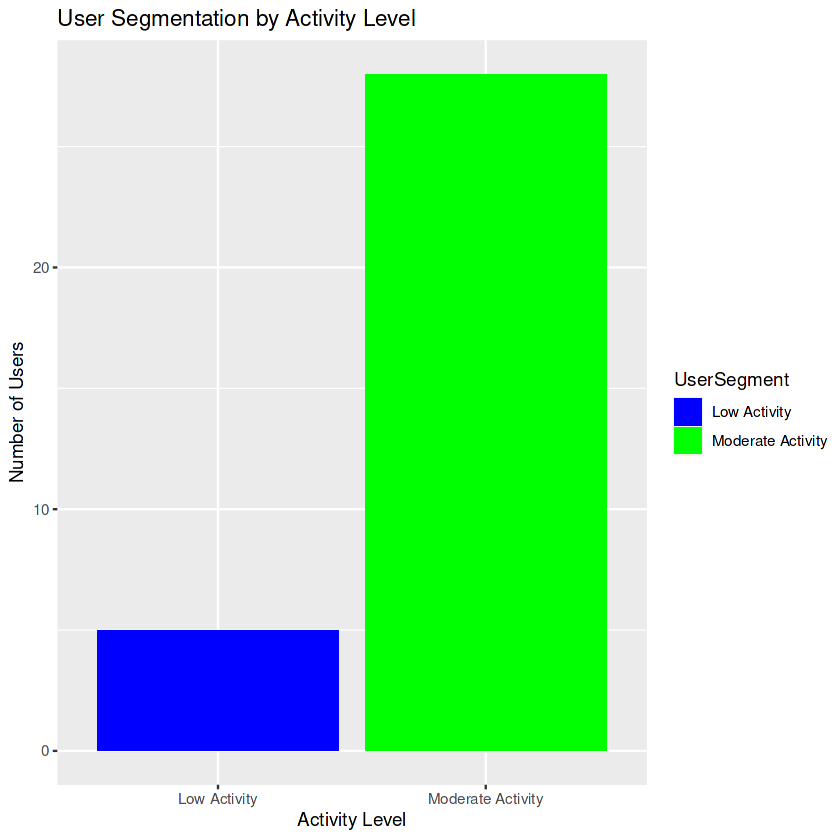

In [48]:
# Create a bar plot for user segmentation
ggplot(user_segments, aes(x = UserSegment, fill = UserSegment)) +
  geom_bar() +
  labs(
    title = "User Segmentation by Activity Level",
    x = "Activity Level",
    y = "Number of Users"
  ) +
  scale_fill_manual(values = c("Low Activity" = "blue", "Moderate Activity" = "green", "High Activity" = "red", "Unknown" = "gray"))

# Adjust the colors and labels as needed


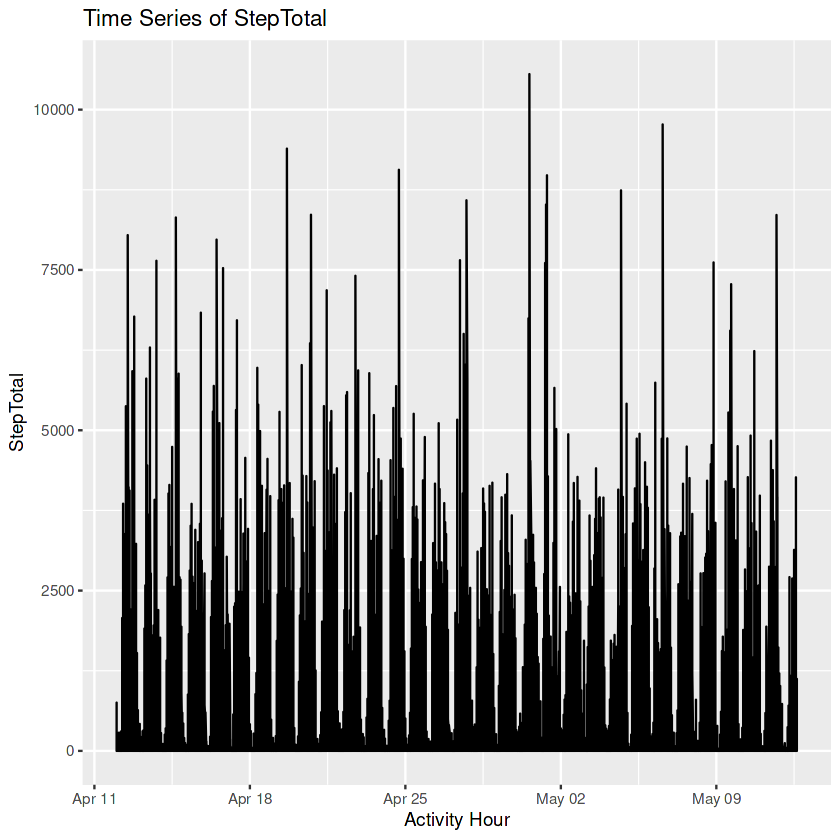

In [49]:
# Create a time series plot of StepTotal

ggplot(hourly, aes(x = ActivityHour, y = StepTotal)) +
  geom_line() +
  labs(title = "Time Series of StepTotal", x = "Activity Hour", y = "StepTotal")


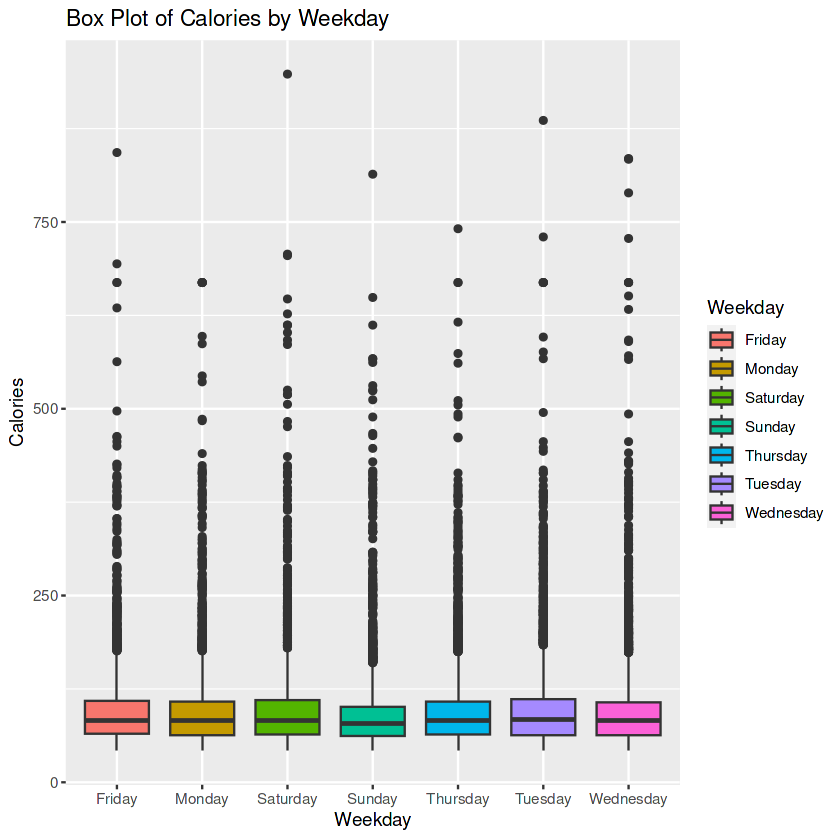

In [50]:
# Create a box plot of Calories by Weekday

ggplot(hourly, aes(x = Weekday, y = Calories, fill = Weekday)) +
  geom_boxplot() +
  labs(title = "Box Plot of Calories by Weekday", x = "Weekday", y = "Calories")


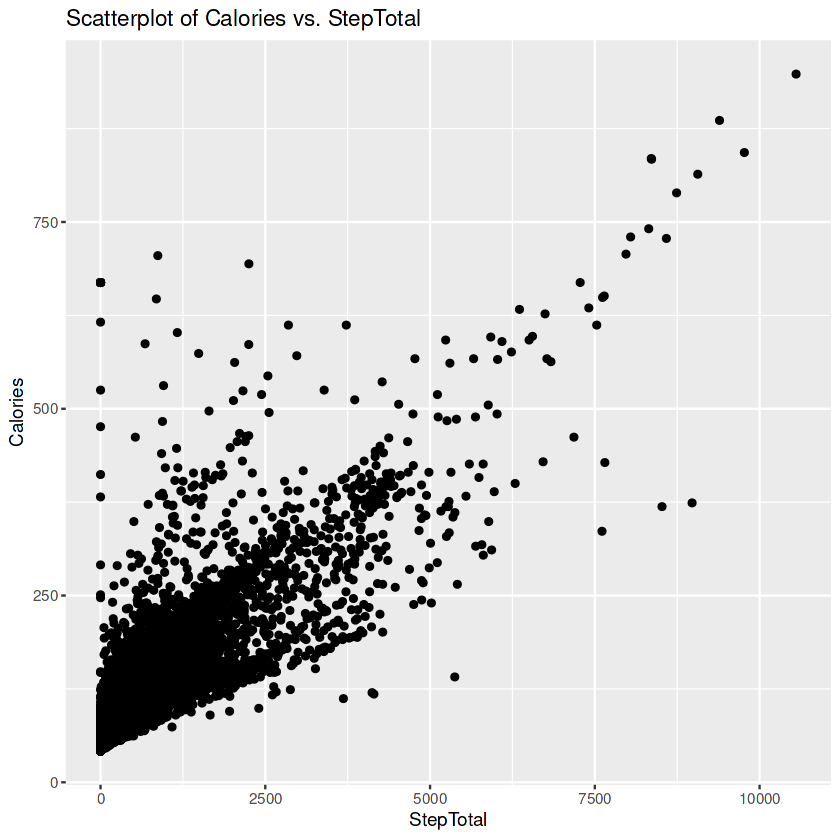

In [51]:
# Create a scatterplot of Calories vs. StepTotal

ggplot(hourly, aes(x = StepTotal, y = Calories)) +
  geom_point() +
  labs(title = "Scatterplot of Calories vs. StepTotal", x = "StepTotal", y = "Calories")


Steps by hour and identifying the time with the highest steps.

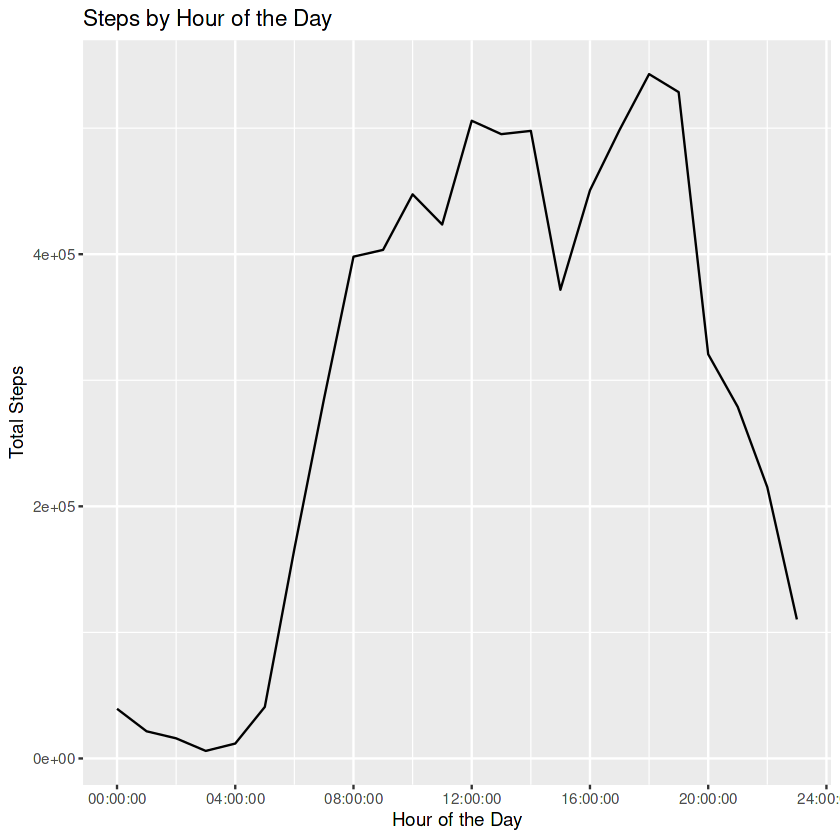

In [52]:
# Group the data by hour and calculate the total steps per hour
steps_by_hour <- hourly %>%
  group_by(Time) %>%
  summarise(TotalSteps = sum(StepTotal))

# Create a line plot to visualize steps by hour
ggplot(steps_by_hour, aes(x = Time, y = TotalSteps)) +
  geom_line() +
  labs(title = "Steps by Hour of the Day", x = "Hour of the Day", y = "Total Steps")


In [53]:
# Explore the Relationship Between Calories and Activity:TotalSteps

# Calculate the correlation between calories and activity levels
correlation_matrix <- daily %>%
  select(Calories, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  cor()

# Print the correlation matrix
print(correlation_matrix)

# Calculate the average calories burned per minute of activity for each activity level
average_calories_per_minute <- daily %>%
  mutate(
    CaloriesPerMinute_VeryActive = Calories / VeryActiveMinutes,
    CaloriesPerMinute_FairlyActive = Calories / FairlyActiveMinutes,
    CaloriesPerMinute_LightlyActive = Calories / LightlyActiveMinutes
  ) %>%
  summarise(
    Mean_CaloriesPerMinute_VeryActive = mean(CaloriesPerMinute_VeryActive, na.rm = TRUE),
    Mean_CaloriesPerMinute_FairlyActive = mean(CaloriesPerMinute_FairlyActive, na.rm = TRUE),
    Mean_CaloriesPerMinute_LightlyActive = mean(CaloriesPerMinute_LightlyActive, na.rm = TRUE)
  )

# Print the average calories burned per minute for each activity level
print(average_calories_per_minute)


                      Calories VeryActiveMinutes FairlyActiveMinutes
Calories             1.0000000         0.6111983          0.17598776
VeryActiveMinutes    0.6111983         1.0000000          0.32289637
FairlyActiveMinutes  0.1759878         0.3228964          1.00000000
LightlyActiveMinutes 0.1137661        -0.2048744         -0.01899857
                     LightlyActiveMinutes
Calories                       0.11376614
VeryActiveMinutes             -0.20487445
FairlyActiveMinutes           -0.01899857
LightlyActiveMinutes           1.00000000
# A tibble: 1 × 3
  Mean_CaloriesPerMinute_VeryAct…¹ Mean_CaloriesPerMinu…² Mean_CaloriesPerMinu…³
                             <dbl>                  <dbl>                  <dbl>
1                              Inf                    Inf                   13.7
# ℹ abbreviated names: ¹​Mean_CaloriesPerMinute_VeryActive,
#   ²​Mean_CaloriesPerMinute_FairlyActive, ³​Mean_CaloriesPerMinute_LightlyActive


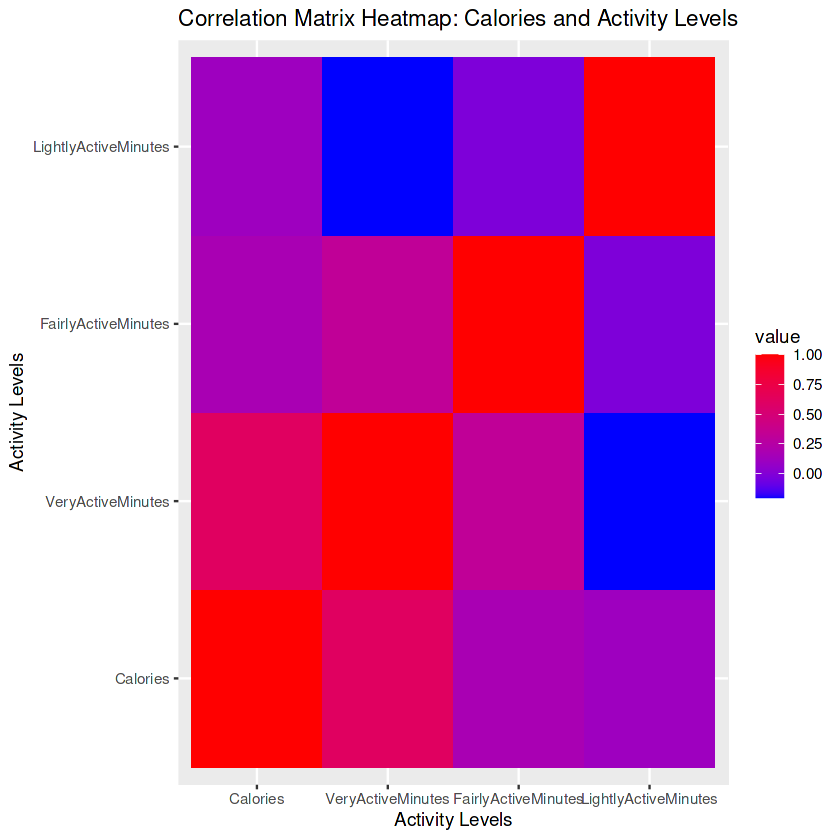

In [54]:
# Calculate the correlation between calories and activity levels
correlation_matrix <- daily %>%
  select(Calories, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes) %>%
  cor()

# Create a heatmap of the correlation matrix
ggplot(data = reshape2::melt(correlation_matrix), aes(x = Var1, y = Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "blue", high = "red") +
  labs(
    title = "Correlation Matrix Heatmap: Calories and Activity Levels",
    x = "Activity Levels",
    y = "Activity Levels"
  )


**App Usage Analysis**

In [55]:
library(tidyverse)

In [56]:
# 1. Number of Users
num_users <- cleaned_activity %>%
  distinct(Id) %>%
  nrow()

print(paste("Number of Users: ", num_users))

[1] "Number of Users:  33"


# A tibble: 33 × 2
           Id NumSessions
        <dbl>       <int>
 1 1503960366          30
 2 1624580081          30
 3 1644430081          30
 4 1844505072          21
 5 1927972279          17
 6 2022484408          31
 7 2026352035          31
 8 2320127002          31
 9 2347167796          18
10 2873212765          31
# ℹ 23 more rows


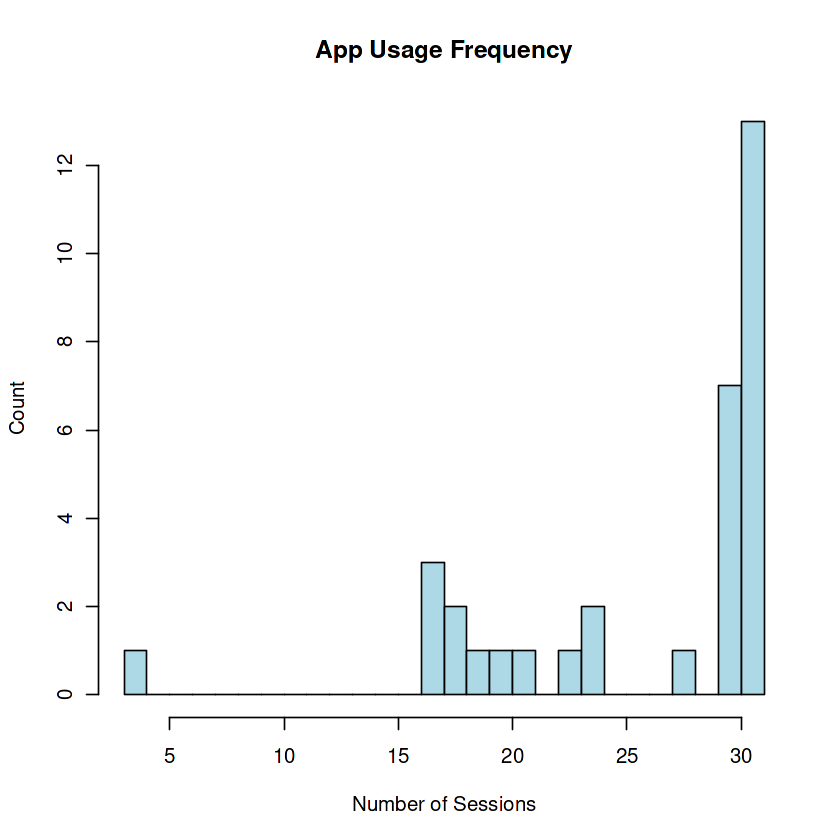

In [57]:
# 2. Frequency of App Usage (Number of App Usage Sessions)
app_usage_sessions <- cleaned_activity %>%
  group_by(Id) %>%
  summarise(NumSessions = n())

print(app_usage_sessions)

hist(app_usage_sessions$NumSessions, breaks = 20, col = "lightblue",
     main = "App Usage Frequency", xlab = "Number of Sessions", ylab = "Count")


In [58]:
# 3. Highest, Lowest, and Average App Usage Frequency
highest_usage <- max(app_usage_sessions$NumSessions)
lowest_usage <- min(app_usage_sessions$NumSessions)
average_usage <- mean(app_usage_sessions$NumSessions)

print(paste("Highest App Usage Frequency: ", highest_usage))
print(paste("Lowest App Usage Frequency: ", lowest_usage))
print(paste("Average App Usage Frequency: ", average_usage))


[1] "Highest App Usage Frequency:  31"
[1] "Lowest App Usage Frequency:  3"
[1] "Average App Usage Frequency:  26.1212121212121"


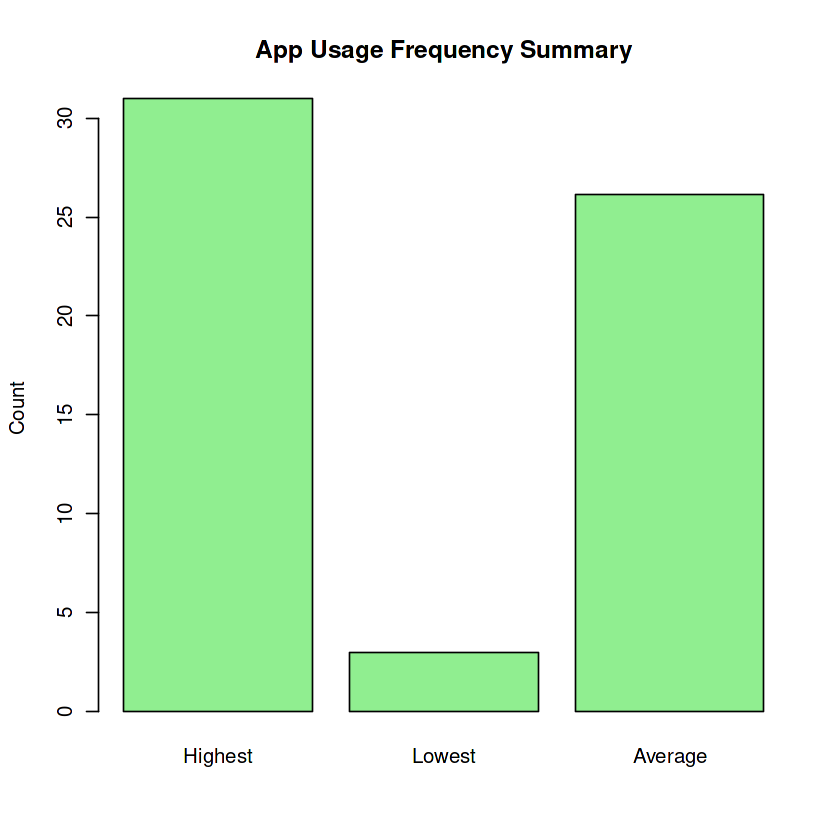

In [59]:
usage_summary <- data.frame(Metric = c("Highest", "Lowest", "Average"),
                            Value = c(highest_usage, lowest_usage, average_usage))


barplot(usage_summary$Value, names.arg = usage_summary$Metric, col = "lightgreen",
        main = "App Usage Frequency Summary", ylab = "Count")

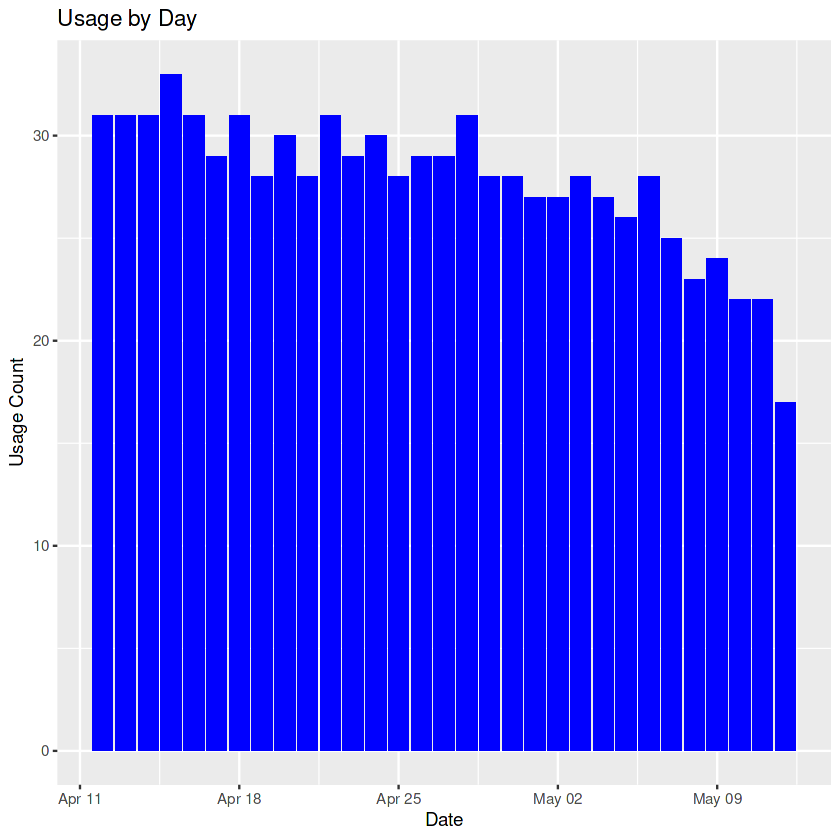

In [60]:
# 4 Assuming you have a data frame named 'app_usage_data' with columns 'Date' and 'UsageTimestamp'

# Count the number of usage sessions per day
usage_by_day <- cleaned_activity %>%
  group_by(Date) %>%
  summarise(UsageCount = n())

# Create a bar plot to visualize daily usage
ggplot(usage_by_day, aes(x = Date, y = UsageCount)) +
  geom_bar(stat = "identity", fill = "blue") +
  labs(x = "Date", y = "Usage Count") +
  ggtitle("Usage by Day")

Hourly

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


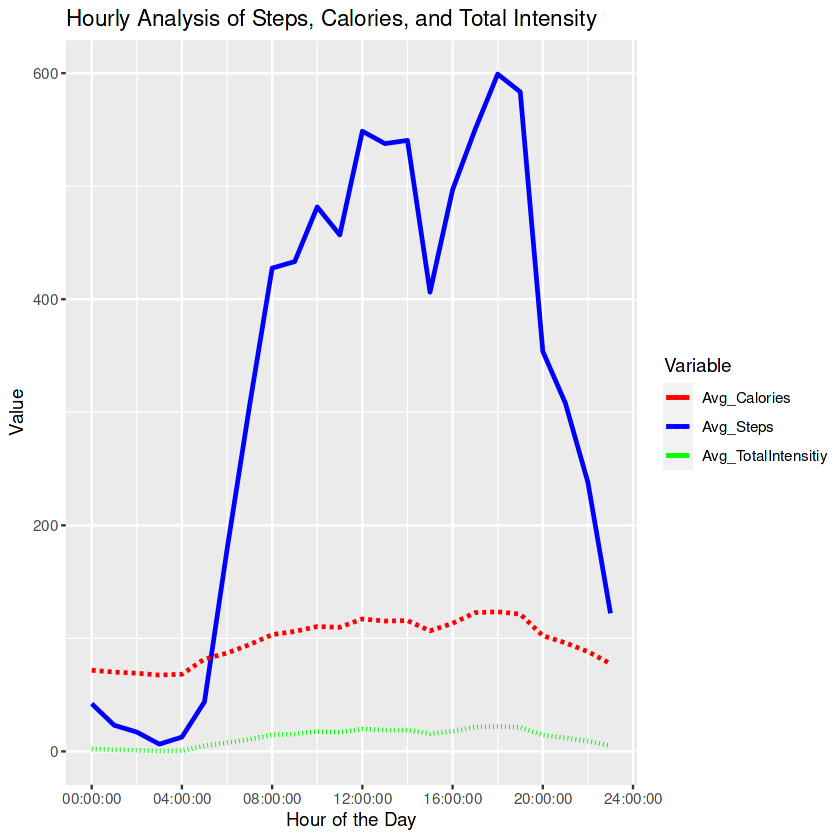

In [61]:
# 1. Time of Day Analysis

hourly_analysis <- hourly %>%
  group_by(Time) %>%
  summarise(
    Avg_Steps = mean(StepTotal),
    Avg_Calories = mean(Calories),
    Avg_TotalIntensitiy = mean(TotalIntensity)
  )


ggplot(hourly_analysis, aes(x = Time)) +
  geom_line(aes(y = Avg_Steps, color = "Avg_Steps"), size = 1) +
  geom_line(aes(y = Avg_Calories, color = "Avg_Calories"), size = 1, linetype = "dashed") +
  geom_line(aes(y = Avg_TotalIntensitiy, color = "Avg_TotalIntensitiy"), size = 1, linetype = "dotted") +
  labs(x = "Hour of the Day", y = "Value", color = "Variable") +
  ggtitle("Hourly Analysis of Steps, Calories, and Total Intensity") +
  scale_color_manual(values = c("Avg_Steps" = "blue", "Avg_Calories" = "red", "Avg_TotalIntensitiy" = "green")) +
  guides(color = guide_legend(title = "Variable"))


In [62]:
# 2. Peak Activity Times based on Avg_Calories
peak_activity_hours <- hourly_analysis %>%
  dplyr::filter(Avg_Calories == max(Avg_Calories))

print(peak_activity_hours)


# A tibble: 1 × 4
  Time   Avg_Steps Avg_Calories Avg_TotalIntensitiy
  <time>     <dbl>        <dbl>               <dbl>
1 18:00       599.         123.                21.9


**Daily analysis**

In [63]:
# 1. Summary Statistics
summary_stats <- cleaned_activity %>%
  summarise(
    Mean_Steps = mean(TotalSteps),
    Mean_Distance = mean(TotalDistance),
    Mean_VeryActiveMinutes = mean(VeryActiveMinutes),
    Mean_LightlyActiveMinutes = mean(LightlyActiveMinutes),
    Mean_SedentaryMinutes = mean(SedentaryMinutes),
    Mean_Calories = mean(Calories)
  )

print(summary_stats)


# A tibble: 1 × 6
  Mean_Steps Mean_Distance Mean_VeryActiveMinutes Mean_LightlyActiveMinutes
       <dbl>         <dbl>                  <dbl>                     <dbl>
1      8287.          5.95                   22.8                      210.
# ℹ 2 more variables: Mean_SedentaryMinutes <dbl>, Mean_Calories <dbl>


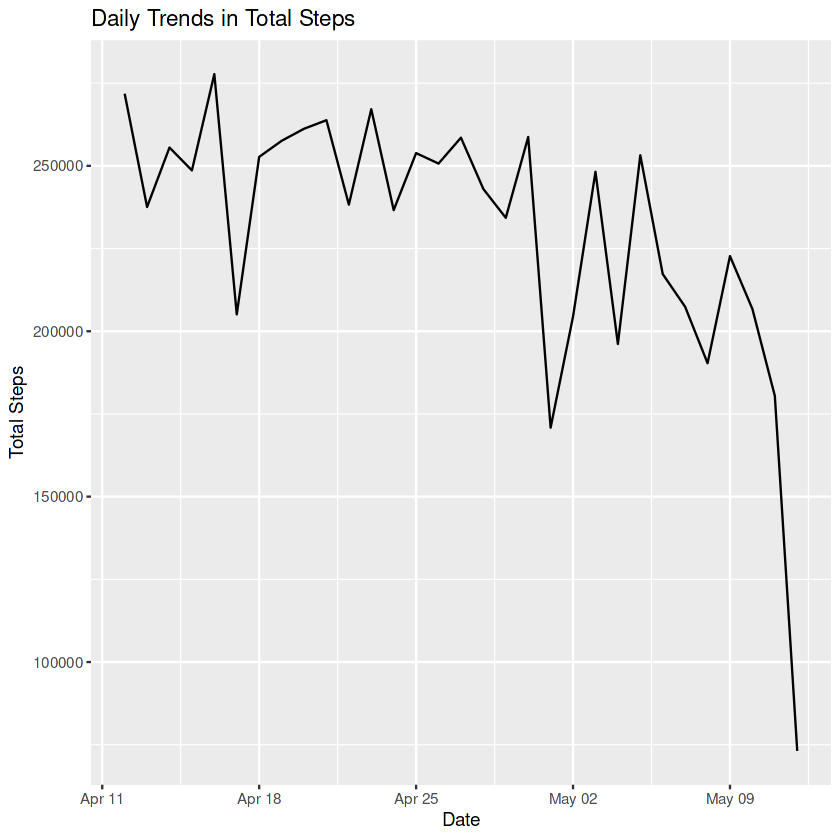

In [64]:
# 2. Daily Trends

daily_trends <- cleaned_activity %>%
  group_by(Date) %>%
  summarise(
    TotalSteps = sum(TotalSteps),
    TotalDistance = sum(TotalDistance),
    TotalCalories = sum(Calories)
  )

ggplot(daily_trends, aes(x = Date, y = TotalSteps)) +
  geom_line() +
  labs(x = "Date", y = "Total Steps") +
  ggtitle("Daily Trends in Total Steps")


`summarise()` has grouped output by 'Date'. You can override using the
`.groups` argument.


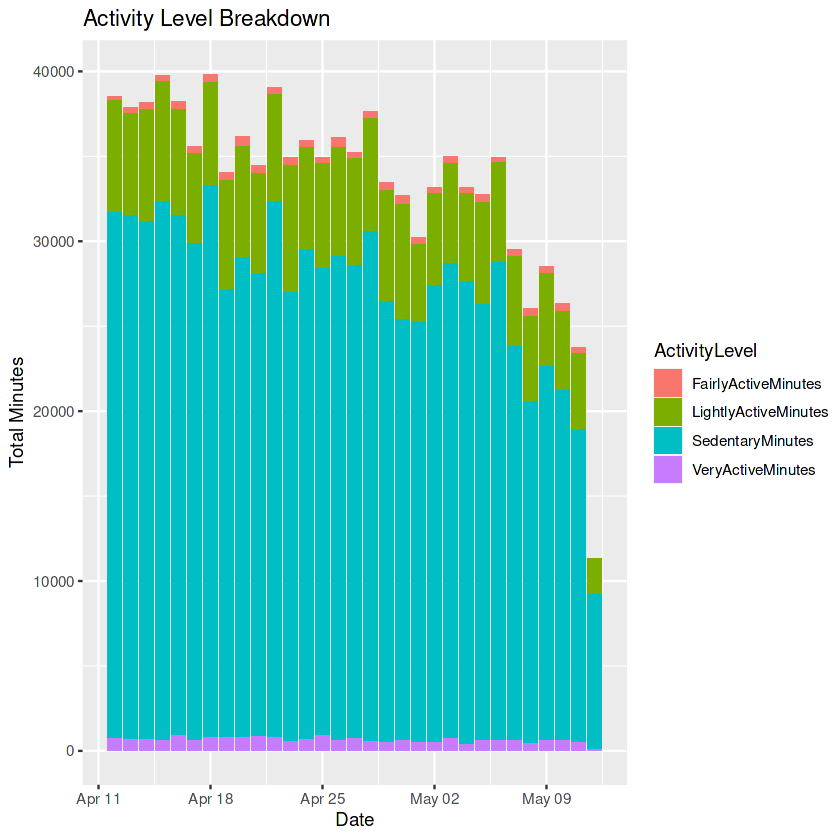

In [65]:
# 3. Activity Level Breakdown

activity_breakdown <- cleaned_activity %>%
  select(Date, VeryActiveMinutes, FairlyActiveMinutes, LightlyActiveMinutes, SedentaryMinutes) %>%
  gather(ActivityLevel, Minutes, -Date) %>%
  group_by(Date, ActivityLevel) %>%
  summarise(TotalMinutes = sum(Minutes))

ggplot(activity_breakdown, aes(x = Date, y = TotalMinutes, fill = ActivityLevel)) +
  geom_bar(stat = "identity") +
  labs(x = "Date", y = "Total Minutes") +
  ggtitle("Activity Level Breakdown")


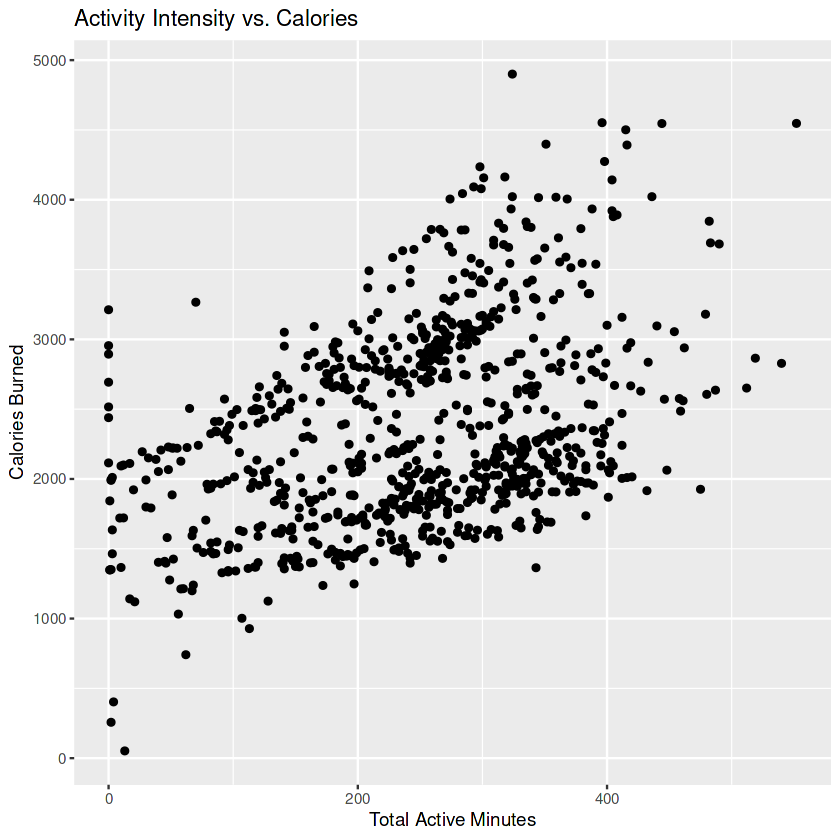

In [66]:
# 4. Activity Intensity vs. Calories (scatterplot)

ggplot(cleaned_activity, aes(x = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes, y = Calories)) +
  geom_point() +
  labs(x = "Total Active Minutes", y = "Calories Burned") +
  ggtitle("Activity Intensity vs. Calories")

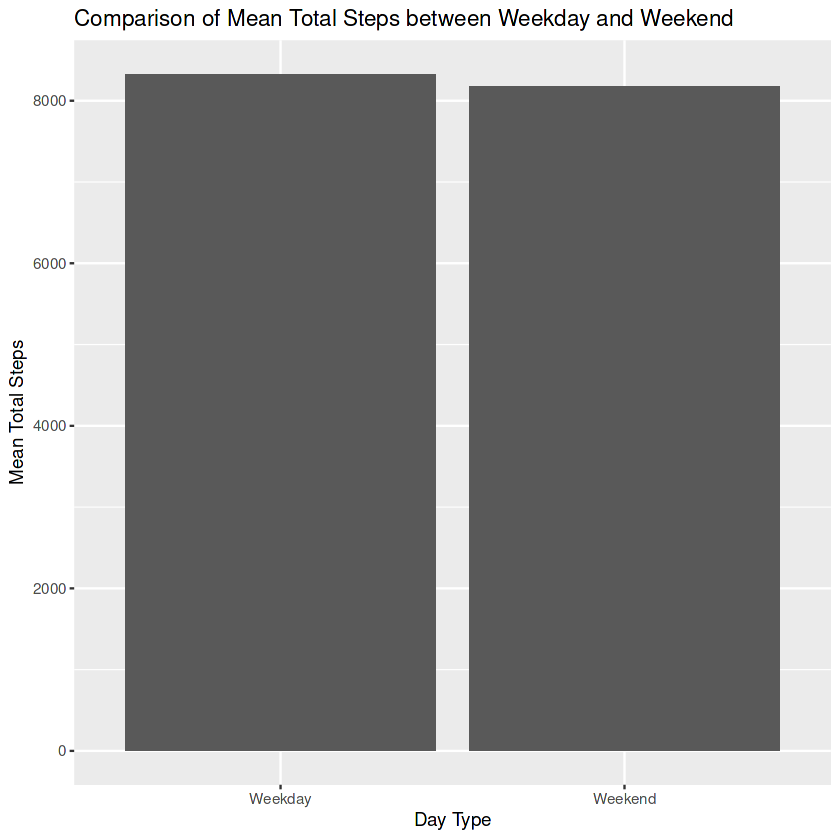

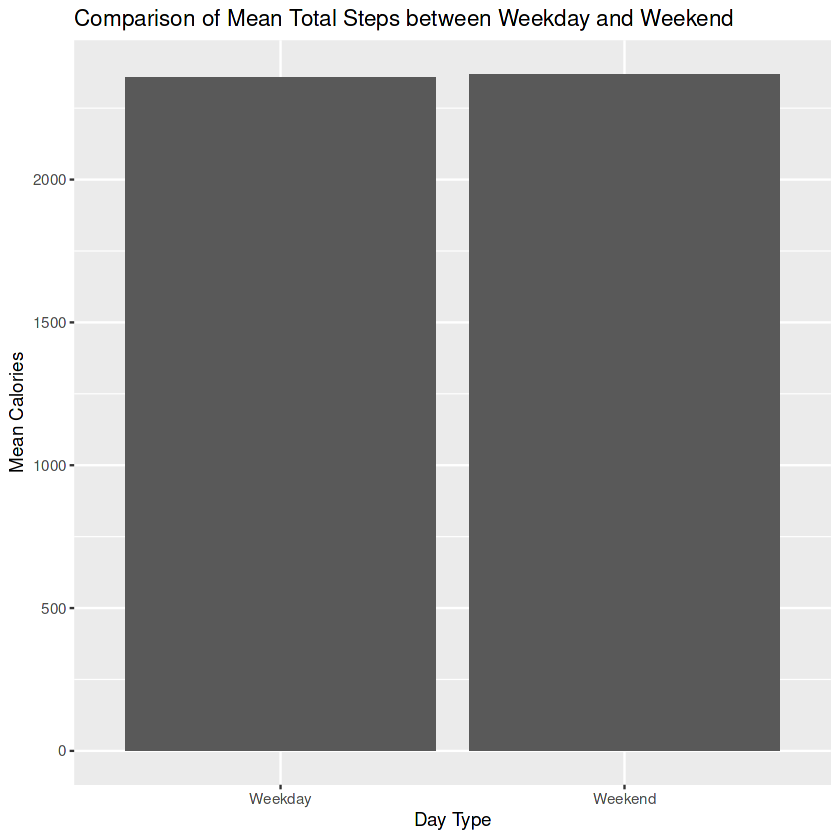

In [67]:
# 5. Weekday vs. Weekend Analysis

weekday_weekend_analysis <- cleaned_activity %>%
  mutate(DayType = ifelse(Weekday %in% c("Saturday", "Sunday"), "Weekend", "Weekday")) %>%
  group_by(DayType) %>%
  summarise(
    Mean_Steps = mean(TotalSteps),
    Mean_Calories = mean(Calories)
  )

# Mean_Steps
ggplot(weekday_weekend_analysis, aes(x = DayType, y = Mean_Steps)) +
  geom_bar(stat = "identity") +
  labs(x = "Day Type", y = "Mean Total Steps") +
  ggtitle("Comparison of Mean Total Steps between Weekday and Weekend")

# Mean_Calories
ggplot(weekday_weekend_analysis, aes(x = DayType, y = Mean_Calories)) +
  geom_bar(stat = "identity") +
  labs(x = "Day Type", y = "Mean Calories") +
  ggtitle("Comparison of Mean Total Steps between Weekday and Weekend")


**5: Share**

**5.1. Data Storytelling:**

Title: Fitbit User Behavior Analysis

Objective and Scope: Today, I will present the findings from our analysis of Fitbit user behavior. Our primary goal is to gain insights into how consumers are using smart devices, focusing on Fitbit users. By analyzing the data from these devices, we aim to understand user behavior, preferences, and patterns, which can guide Bellabeat's marketing strategy to unlock new growth opportunities, either through product enhancement or new product development.

Key Stakeholders: Before we dive into the findings, let's identify the key stakeholders for this analysis. They include Urška Sršen, Bellabeat's Co-founder and Chief Creative Officer, Sando Mur, Bellabeat's Co-founder and a key member of the executive team, and the Bellabeat Marketing Analytics Team, including our junior data analyst. Our primary audience today is the Bellabeat executive team, who will use these insights to make informed decisions.

Data Preparation: Our analysis began with data collection. We obtained this dataset through a distributed survey via Amazon Mechanical Turk, collected between 03.12.2016 and 05.12.2016. It includes responses from a total of 33 eligible Fitbit users who consented to share personal tracker data. The data encompasses minute-level outputs for physical activity, heart rate, and sleep monitoring. Importantly, it's worth noting that the dataset lacks information about participants' demographics, such as gender, age, and location.

Data Limitations: An important issue to address is the limited size of our dataset. We have data from 33 participants, with the highest usage being 31 times, the lowest 3 times, and an average of 26 times. Additionally, the data spans only one month, making it challenging to analyze trends related to seasons or holidays. Given these limitations, we should exercise caution in drawing broad conclusions.


**5.2.1. Findings:**

**Usage Patterns:** Despite the data constraints, we found that Fitbit users interact with the app approximately 26 times on average within a month. The usage varies, with some users engaging as frequently as 31 times per month, while others use it as little as 3 times. These usage patterns offer valuable insights into user engagement and suggest opportunities for tailored marketing strategies.

In [68]:
library(IRdisplay)

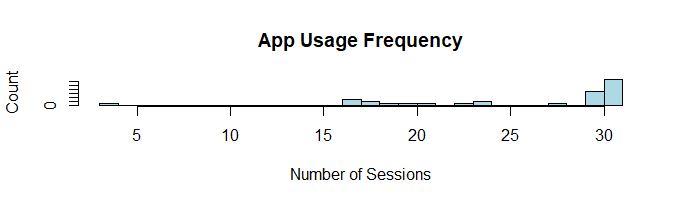

In [69]:
display_png(file = "/kaggle/input/images/App usage frequency.png")

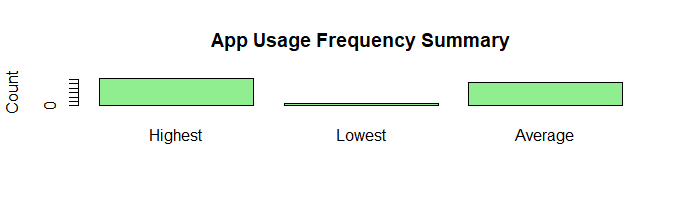

In [70]:
display_png(file = "/kaggle/input/images/App usage summary.png")


**User Engagement Over Time:** We observed that users' interest in logging into the app decreased with time. This trend indicates the need for strategies to maintain user engagement and retention.

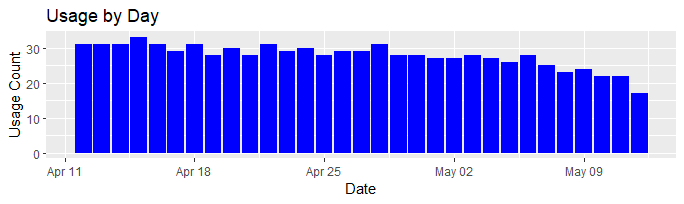

In [71]:
display_png(file = "/kaggle/input/images/Usage over time.png")

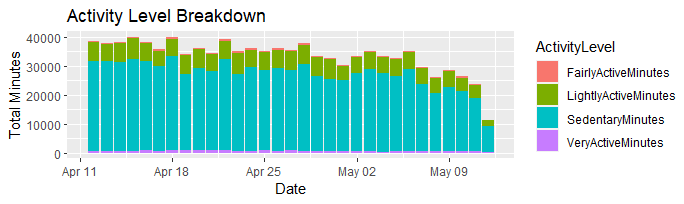

In [72]:
display_png(file = "//kaggle/input/images/Activity level by day.png")


**Activity Timing:** Our analysis has identified a prominent peak in user activity around 6 PM. This spike in engagement suggests a potential prime time for user interaction with the Fitbit app. Understanding this peak can help us optimize marketing efforts and product features around this specific time frame.


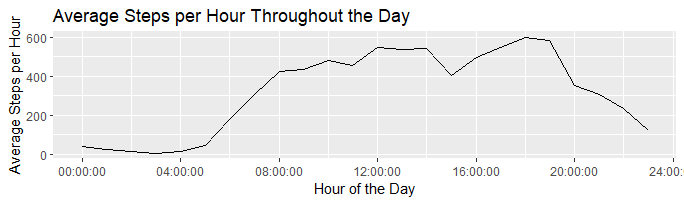

In [73]:
display_png(file = "/kaggle/input/images/Avg Steps per Hour by Day.png")

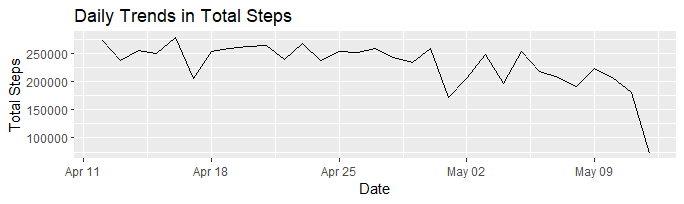

In [74]:
display_png(file = "/kaggle/input/images/Daily Steps.png")

**Correlation Between Variables:** There is a strong positive correlation between all variables in the dataset, including steps, calories, and activity level. This suggests that users who are more active in terms of steps and activity level tend to burn more calories.

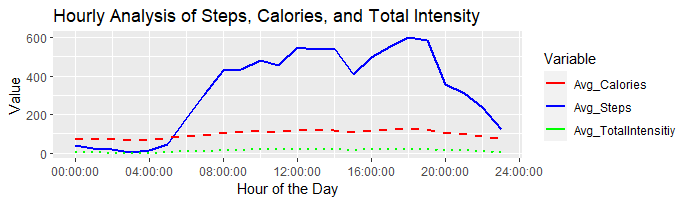

In [75]:
display_png(file = "/kaggle/input/images/Combined Hourly Analysis.png")

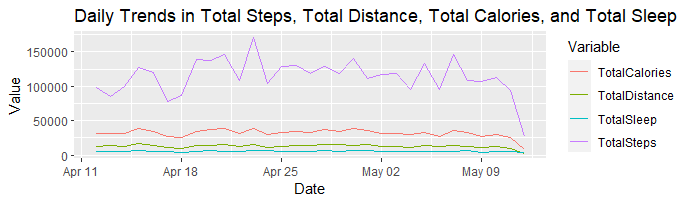

In [76]:
display_png(file = "/kaggle/input/images/Daily Trend with sleep.png")


**Active Minutes and Calories Burnt:** We found a positive relationship between active minutes and calories burnt. The higher the active minutes, the higher the calories burnt.

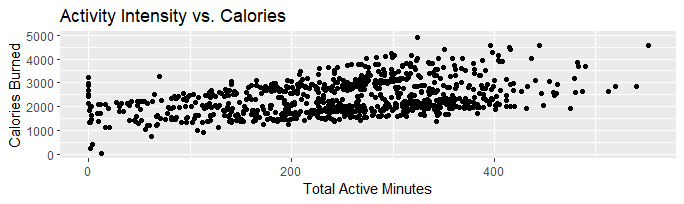

In [77]:
display_png(file = "/kaggle/input/images/Calories vs Intensity.png")

**Weekday vs. Weekend Activity:** Our analysis did not reveal a significant difference between weekday and weekend activity levels among users.

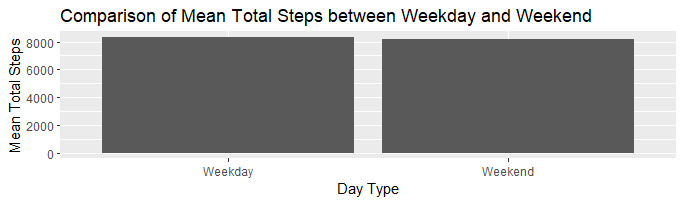

In [78]:
display_png(file = "/kaggle/input/images/Weekend vs Weekday.png")

**5.3. Recommendations**

*Extend Data Collection:* To capture seasonality and holiday-related trends more effectively, consider extending data collection over a more extended period.

*Increase Sample Size:* If feasible, increase the sample size by collecting data from more participants. This will enhance the accuracy and reliability of our insights.

*Target Peak Activity Times:* Utilize the insight about the peak activity time at 6 PM to optimize marketing efforts and product features during this period.

*Enhance User Engagement:* Develop strategies to maintain and enhance user engagement over time to combat declining usage.

*Monitor Active Minutes:* Encourage users to increase their active minutes, as this positively affects calorie burn and overall fitness.


**5.4. Conclusion**

In conclusion, while our dataset is limited, the insights we've gathered provide a starting point for further exploration and data collection. These preliminary findings offer valuable direction for Bellabeat's marketing strategy, with the potential for more robust insights in the future. The key takeaway is the need for strategies to maintain user engagement, particularly during peak usage times and as user interest wanes over time.